# EMPRESA XYZ

**Por:** Jose Daniel Alvear Acevedo

## Aplicación de Modelo de Regresión Logística Binomial

In [1]:
!pip install pandas_profiling
import pandas as pd
import numpy as np
import seaborn as sns

from scipy.stats import zscore 
from datetime import date

import matplotlib.pyplot as plt
import seaborn as  sns

from pandas_profiling import ProfileReport
import ydata_profiling

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

Defaulting to user installation because normal site-packages is not writeable


C:\Users\jalvear\AppData\Local\Temp\ipykernel_12116\3583719388.py:12: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


## Carga de Datos

In [2]:
df_xyz = pd.read_excel('Base PRUEBA - ANALITICA.xlsx')
df_xyz.head()
df_xyz_final = df_xyz.copy(deep=True)

## Analisis exploratorio

In [3]:
df_xyz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33668 entries, 0 to 33667
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   SOLICITUD          33668 non-null  int64         
 1   FECHA_INICIO       33668 non-null  datetime64[ns]
 2   MULTAS_SIMIT       33668 non-null  float64       
 3   EDAD               33668 non-null  int64         
 4   CUOTA_INICIAL      33668 non-null  int64         
 5   GENERO             33668 non-null  object        
 6   ESTADO_CIVIL       33668 non-null  object        
 7   NIVEL_ESTUDIO      33668 non-null  object        
 8   TIPO_VIVIENDA      33668 non-null  object        
 9   PERSONAS_CARGO     33668 non-null  int64         
 10  ZONA               33668 non-null  object        
 11  PLAZO              33668 non-null  int64         
 12  CODEUDOR           33668 non-null  object        
 13  VALOR_SOLICITADO   33668 non-null  float64       
 14  INGRES

**Verificación de datos faltantes**

In [4]:
df_xyz.isnull().sum()

SOLICITUD              0
FECHA_INICIO           0
MULTAS_SIMIT           0
EDAD                   0
CUOTA_INICIAL          0
GENERO                 0
ESTADO_CIVIL           0
NIVEL_ESTUDIO          0
TIPO_VIVIENDA          0
PERSONAS_CARGO         0
ZONA                   0
PLAZO                  0
CODEUDOR               0
VALOR_SOLICITADO       0
INGRESOS               0
EGRESOS                0
SUBTIPO_CLIENTE        0
TIPO_CLIENTE           0
HABITO_PAGO            0
ENDEUDAMIENTO          0
CALIFICACION           0
CREDITOS_VIGENTES      0
Puntaje Riesgo         0
TIPO_CONTRATO        377
ANTIGUEDAD             0
Marca producto         0
Estado                 0
dtype: int64

In [5]:
profile = ProfileReport(df_xyz, minimal=True)
profile.to_file(output_file='empresa_xyz.html')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**Tratamiento de valores nulos**

In [6]:
df_xyz.fillna({'TIPO_CONTRATO': 'No identificado'}, inplace=True)

In [7]:
df_xyz.isnull().sum()

SOLICITUD            0
FECHA_INICIO         0
MULTAS_SIMIT         0
EDAD                 0
CUOTA_INICIAL        0
GENERO               0
ESTADO_CIVIL         0
NIVEL_ESTUDIO        0
TIPO_VIVIENDA        0
PERSONAS_CARGO       0
ZONA                 0
PLAZO                0
CODEUDOR             0
VALOR_SOLICITADO     0
INGRESOS             0
EGRESOS              0
SUBTIPO_CLIENTE      0
TIPO_CLIENTE         0
HABITO_PAGO          0
ENDEUDAMIENTO        0
CALIFICACION         0
CREDITOS_VIGENTES    0
Puntaje Riesgo       0
TIPO_CONTRATO        0
ANTIGUEDAD           0
Marca producto       0
Estado               0
dtype: int64

In [8]:
print(df_xyz['Estado'].unique())

['Aprobada' 'Desistida' 'Anulada' 'Negada']


**Tratamiento de variable objetivo**

In [9]:
##Tratamiento de variable objetivo
df_xyz.Estado.replace(to_replace=['Desistida', 'Aprobada', 'Anulada', 'Negada'], value = [1,0,0,0], inplace = True)

In [10]:
print(df_xyz['Estado'].unique())

[0 1]


In [11]:
df_xyz.head()

SOLICITUD FECHA_INICIO  MULTAS_SIMIT  EDAD  CUOTA_INICIAL GENERO  \
0          1   2017-01-02           0.0    29              0      F   
1          2   2017-01-02           0.0    60        1035000      F   
2          3   2017-01-02           0.0    61         472500      M   
3          4   2017-01-02           0.0    25              0      M   
4          5   2017-01-02           0.0    30        3672000      F   

  ESTADO_CIVIL NIVEL_ESTUDIO TIPO_VIVIENDA  PERSONAS_CARGO  ...  \
0   Divorciado   Tecnólogico     Arrendada               2  ...   
1      Soltero   Tecnólogico     Arrendada               1  ...   
2   Divorciado   Tecnólogico     Arrendada               1  ...   
3       Casado   Tecnólogico     Arrendada               2  ...   
4   Divorciado   Tecnólogico     Arrendada               3  ...   

                        TIPO_CLIENTE  HABITO_PAGO ENDEUDAMIENTO  CALIFICACION  \
0  Independiente sin Establecimiento            B       85860.0             A   
1  Independiente sin Establecimiento            E     1270940.0             C   
2  Independiente sin Establecimiento            E      664620.0             C   
3  Independiente sin Establecimiento            B       51940.0             A   
4  Independiente sin Establecimiento            B           0.0             A   

   CREDITOS_VIGENTES  Puntaje Riesgo                      TIPO_CONTRATO  \
0                  2            2190                         Indefinido   
1                  9            2142                   Por Obra o Labor   
2                  7            2073                         Indefinido   
3                  2            1929                               Otra   
4                  2               3  INDEPENDIENTE SIN ESTABLECIMIENTO   

  ANTIGUEDAD Marca producto  Estado  
0         10        Marca A       0  
1        131        Marca A       1  
2         63        Marca B       0  
3         12        Marca A       0  
4        131        Marca A       0  

[5 rows x 27 columns]

**Eliminación de columnas**

In [12]:
#Eliminación de columnas 
df_xyz.drop(['SOLICITUD', 'FECHA_INICIO'], axis=1, inplace=True)

**Aplicación de Dummies**

In [13]:
# Aplicación de Dummies
df_xyz = pd.get_dummies(df_xyz)
df_xyz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33668 entries, 0 to 33667
Data columns (total 85 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   MULTAS_SIMIT                                     33668 non-null  float64
 1   EDAD                                             33668 non-null  int64  
 2   CUOTA_INICIAL                                    33668 non-null  int64  
 3   PERSONAS_CARGO                                   33668 non-null  int64  
 4   PLAZO                                            33668 non-null  int64  
 5   VALOR_SOLICITADO                                 33668 non-null  float64
 6   INGRESOS                                         33668 non-null  float64
 7   EGRESOS                                          33668 non-null  float64
 8   ENDEUDAMIENTO                                    33668 non-null  float64
 9   CREDITOS_VIGENTES           

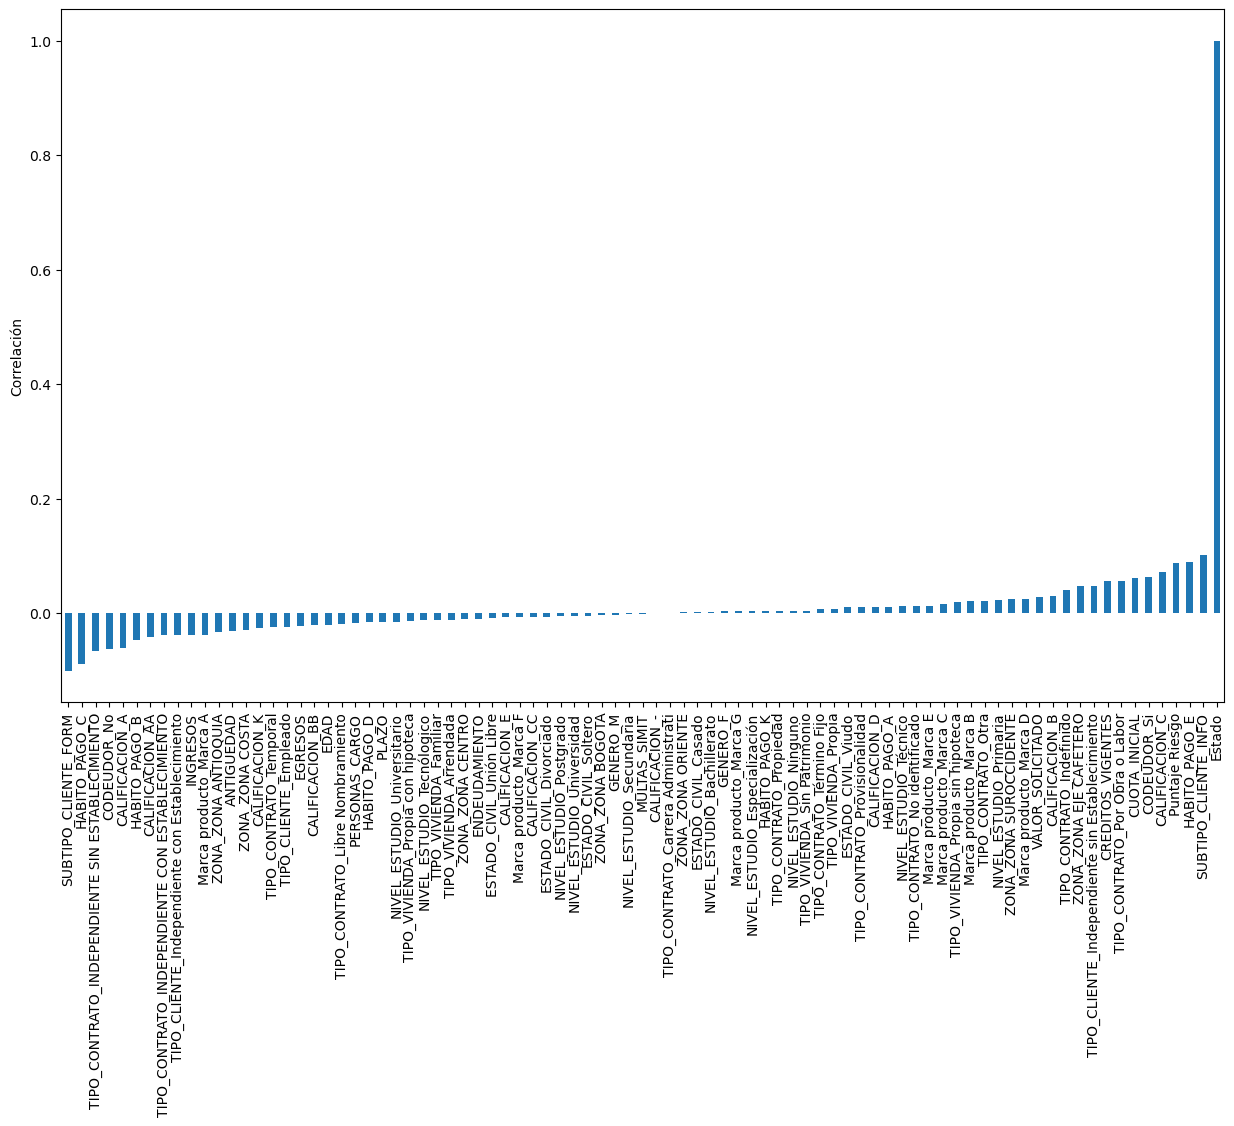

In [14]:
#Analisis de correlación de variable objetivo
%matplotlib inline
fig = plt.figure(figsize=(15,9))
df_xyz.corr()['Estado'].sort_values(ascending=True).plot(kind='bar')
plt.ylabel('Correlación')
plt.show()

No hay variables altamente correlacionadas entre si; lo mas seguro es que no presentemos el problema de multicolinealidad.

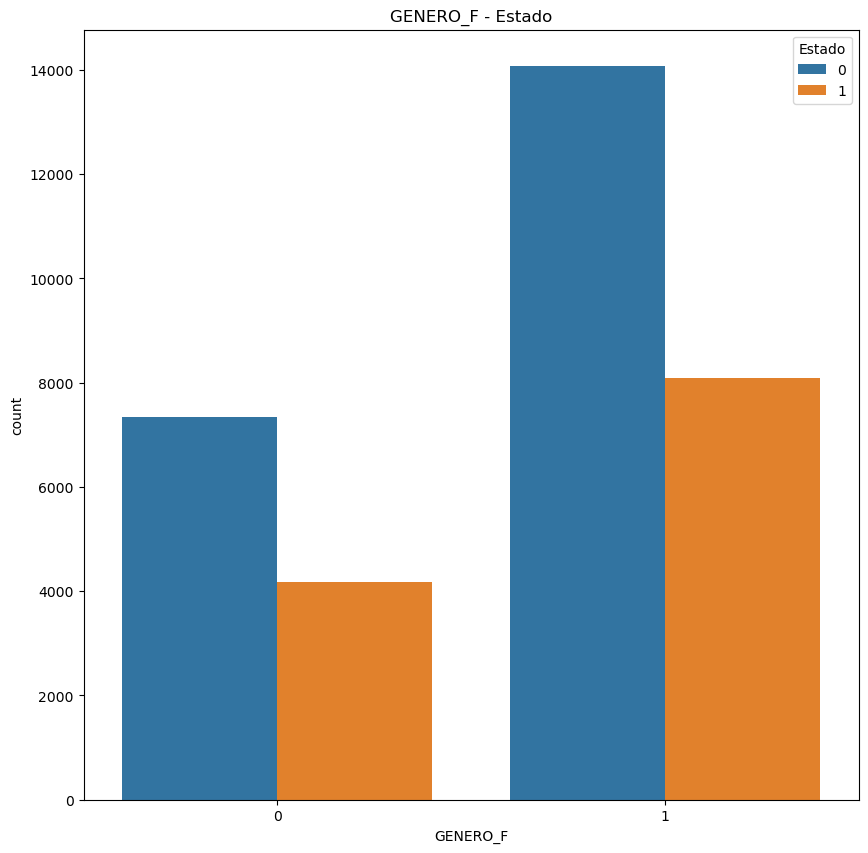

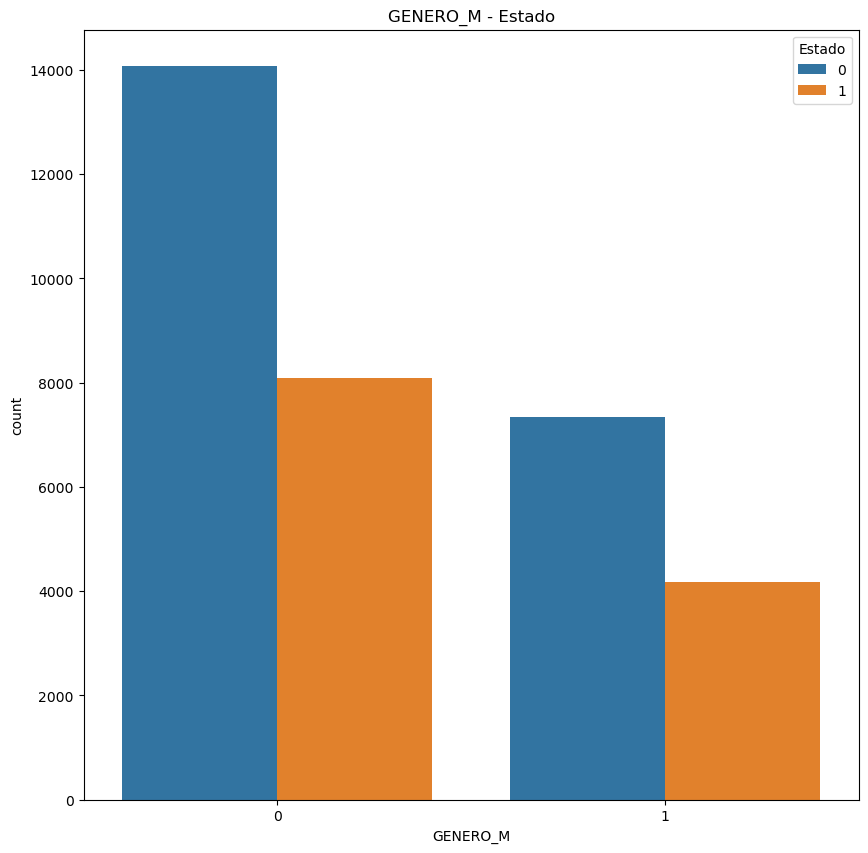

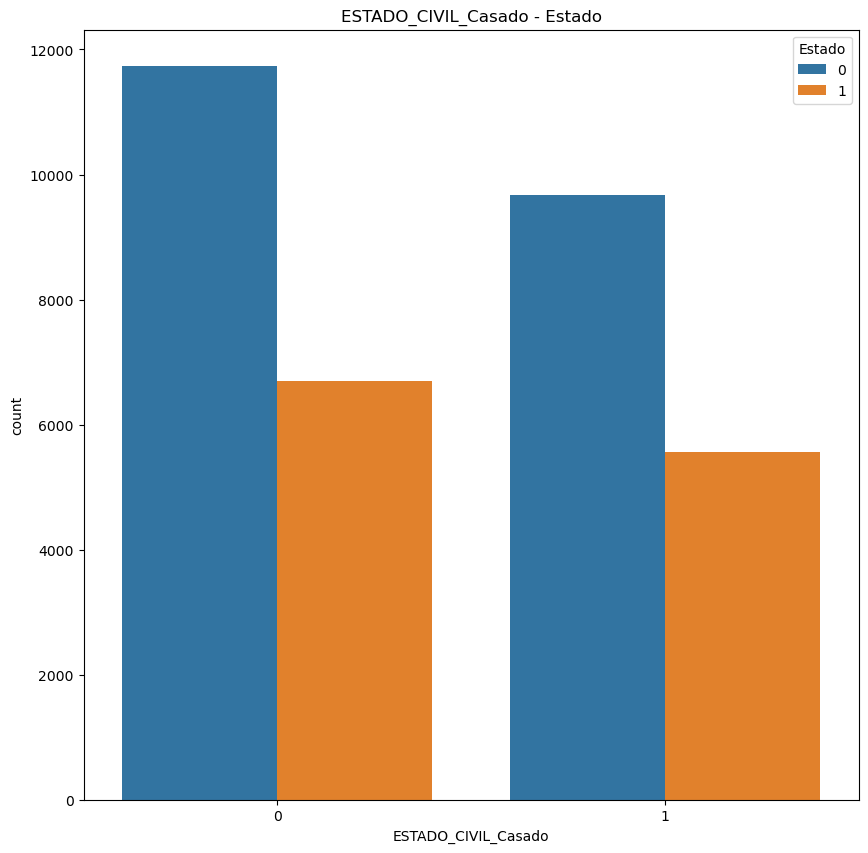

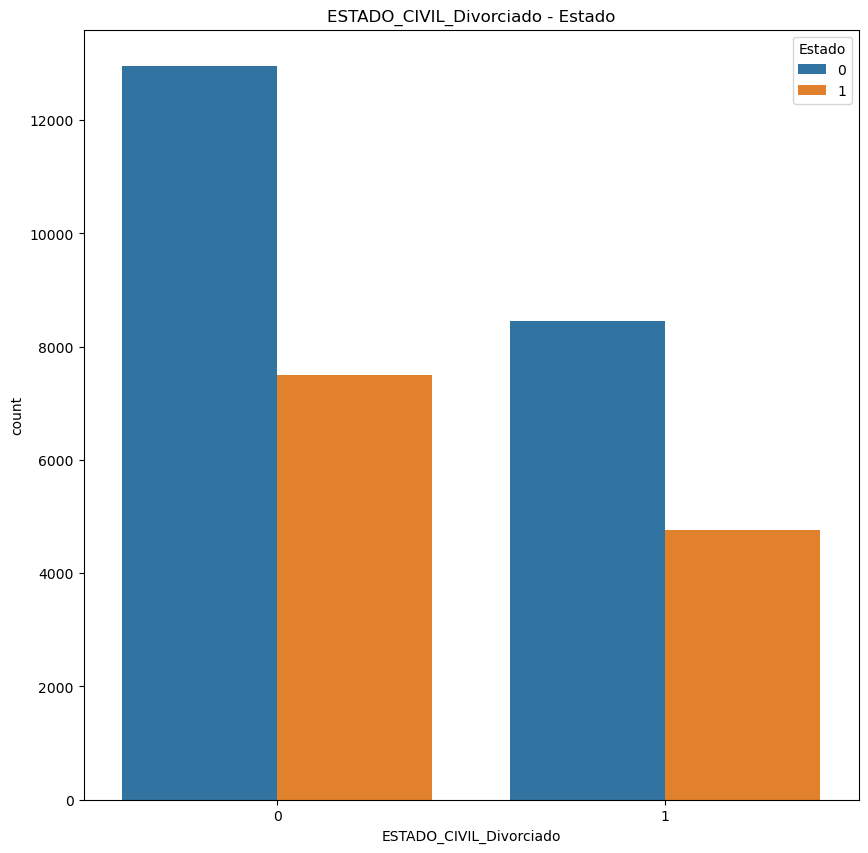

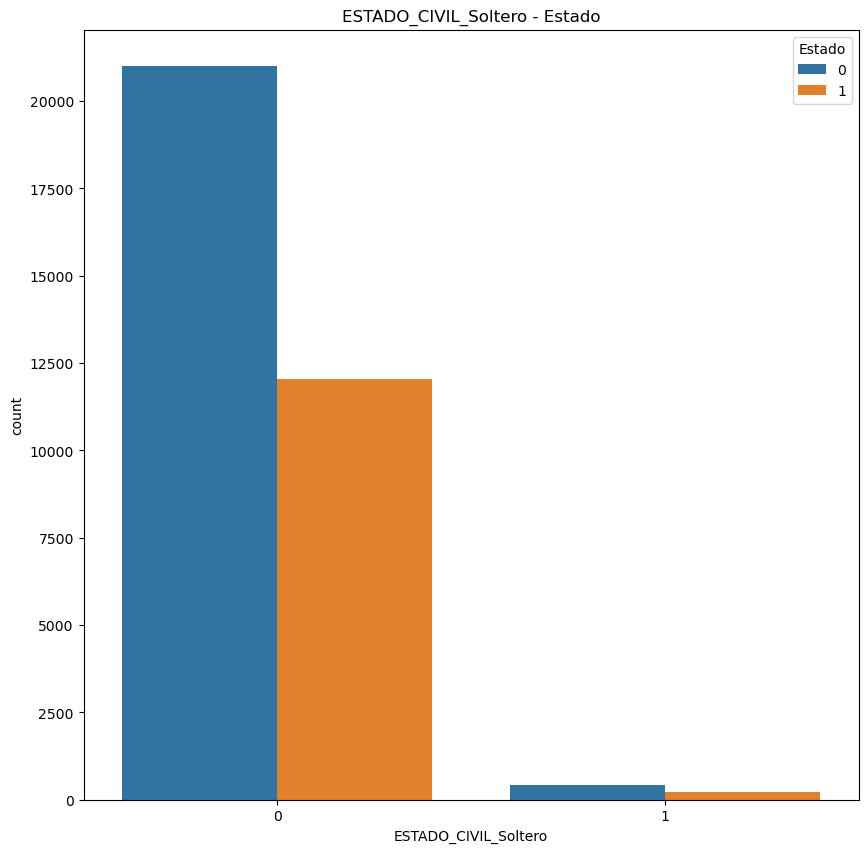

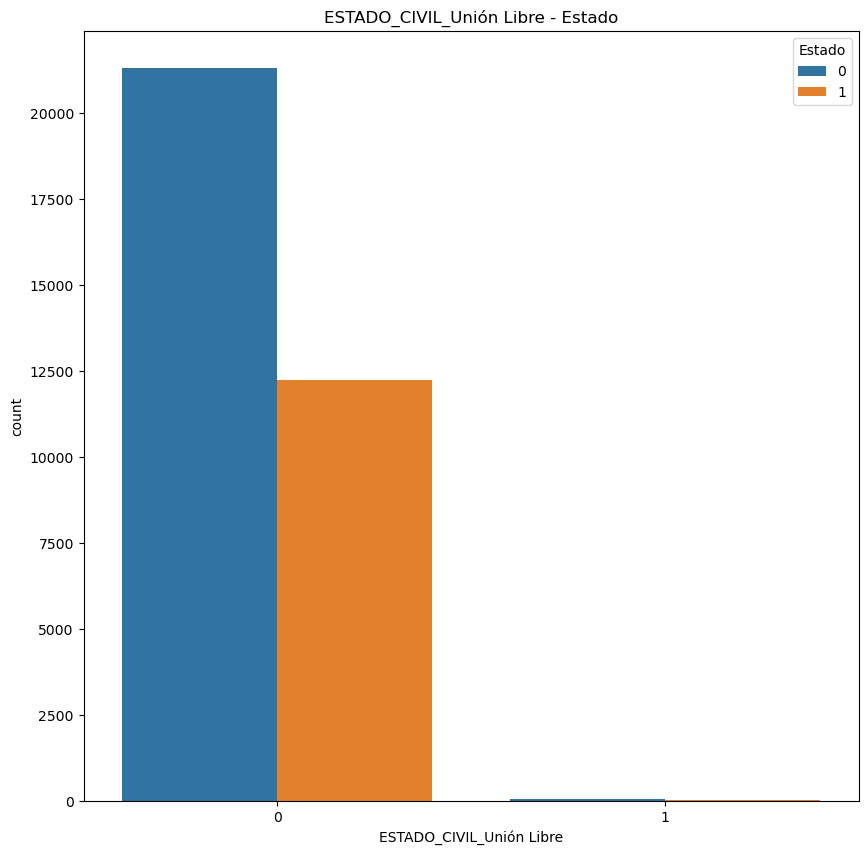

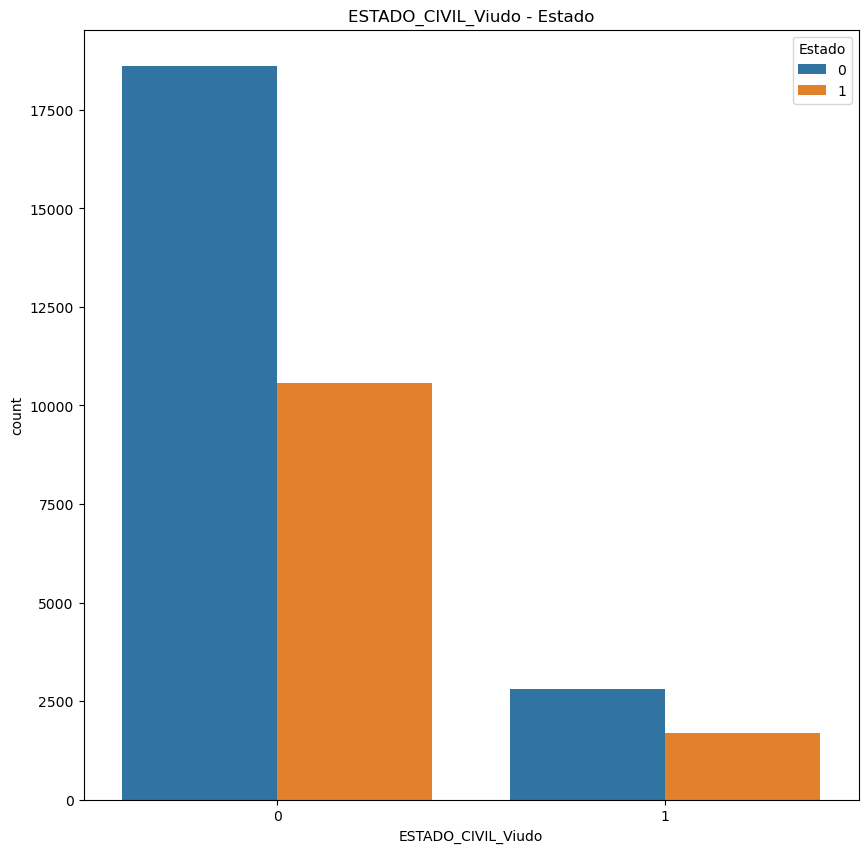

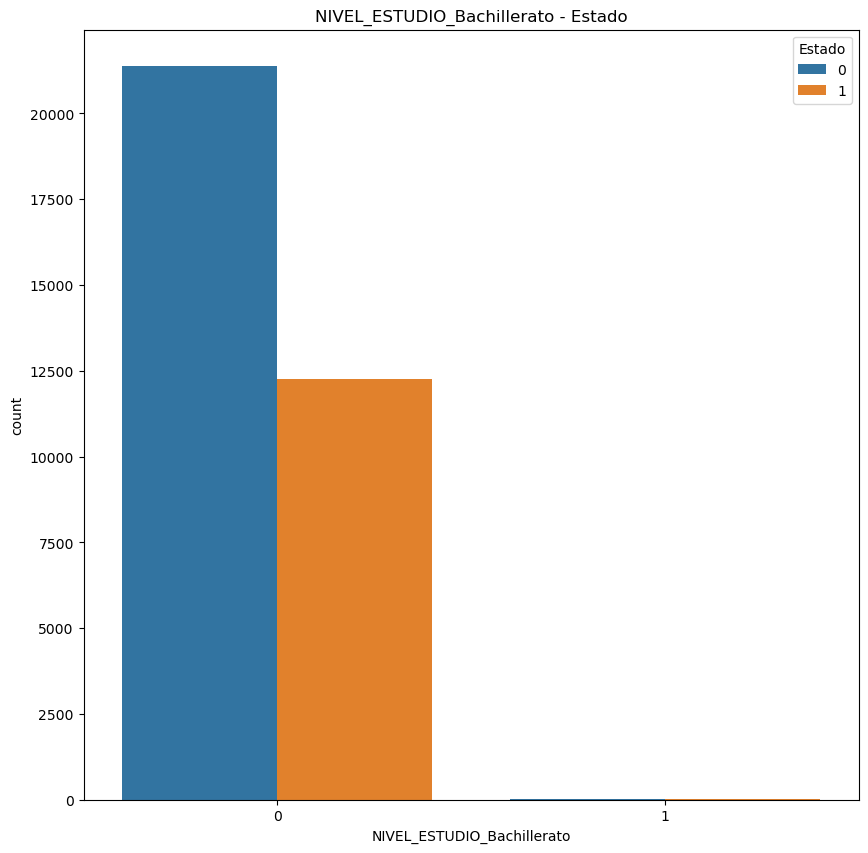

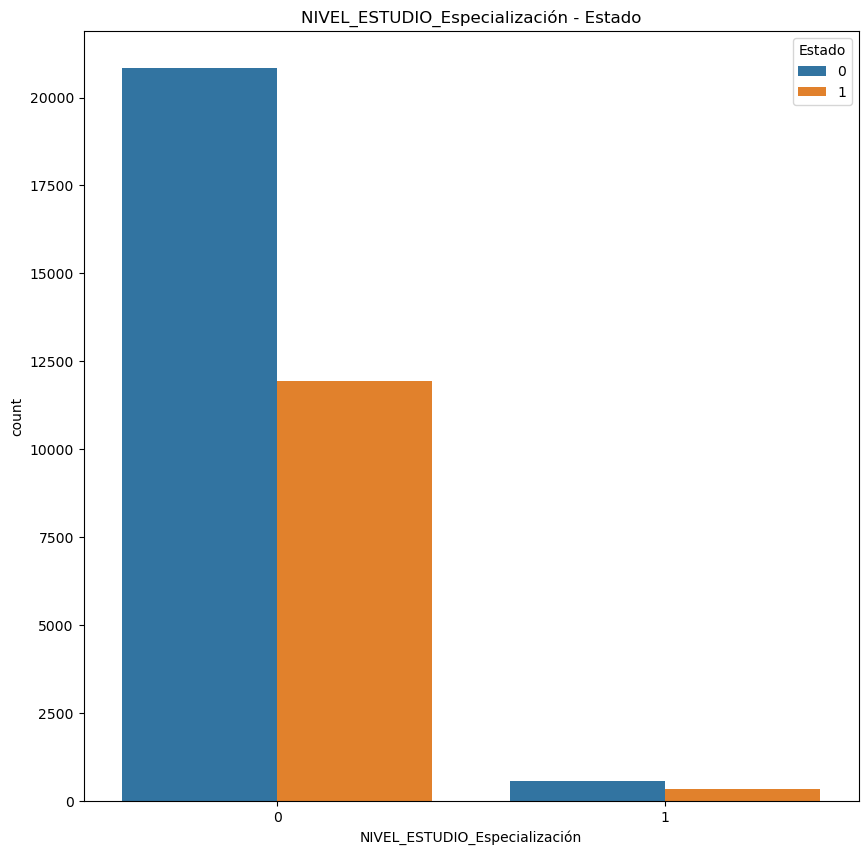

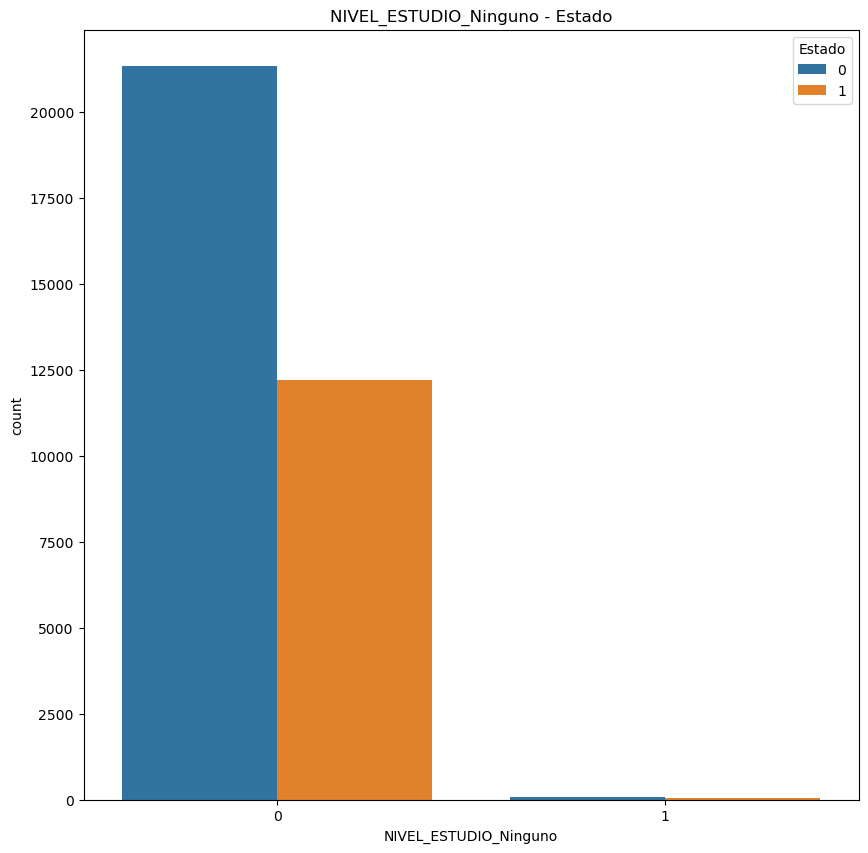

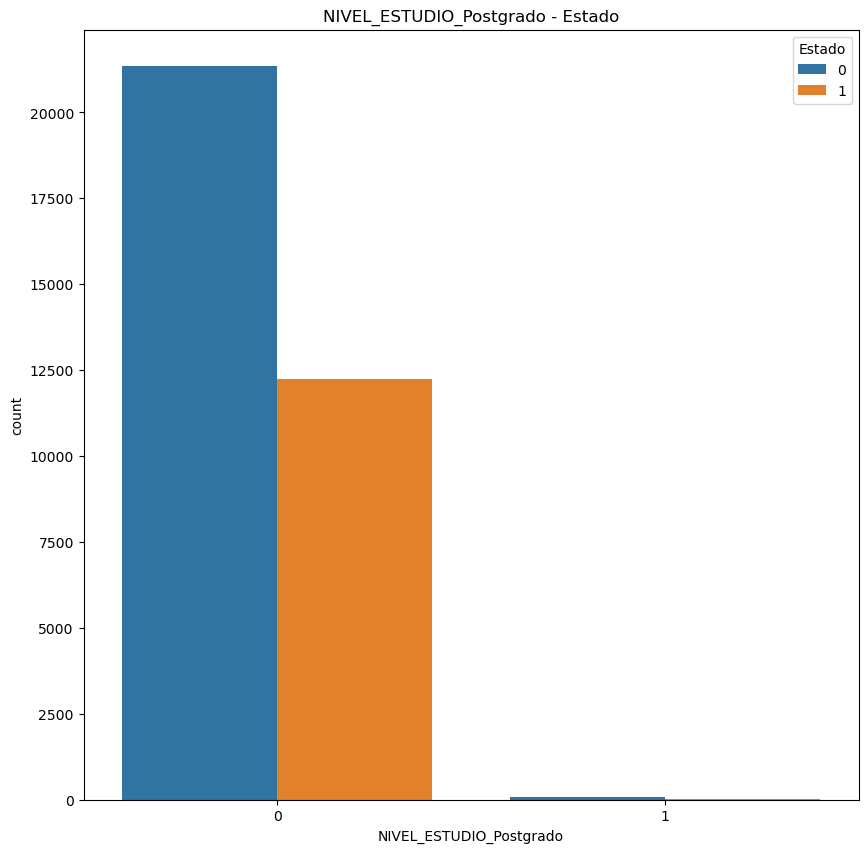

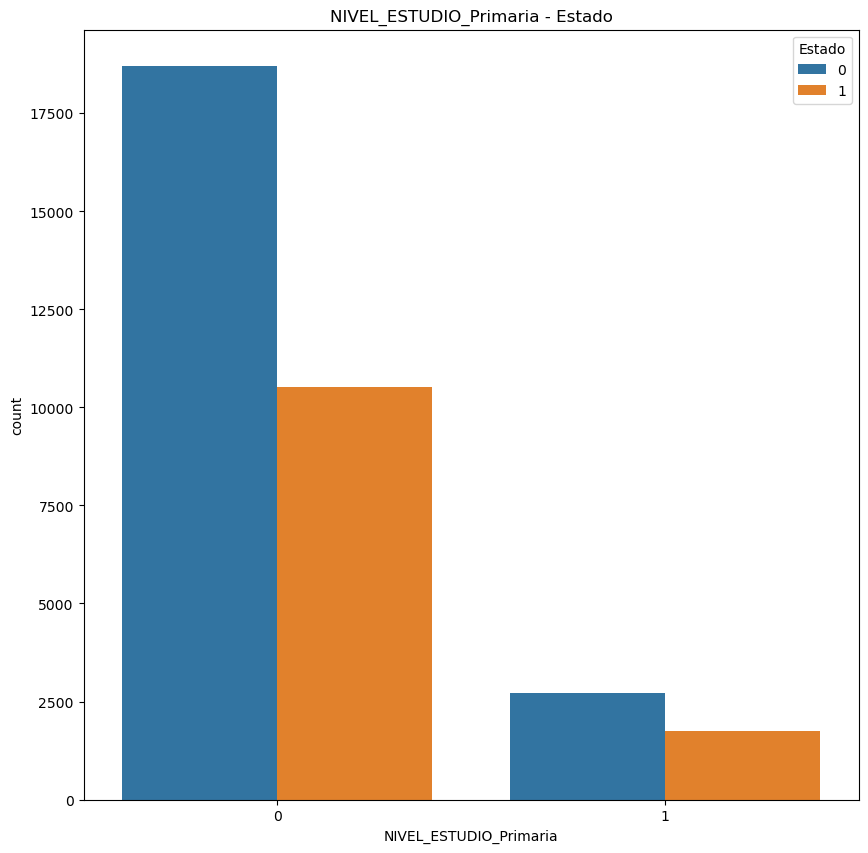

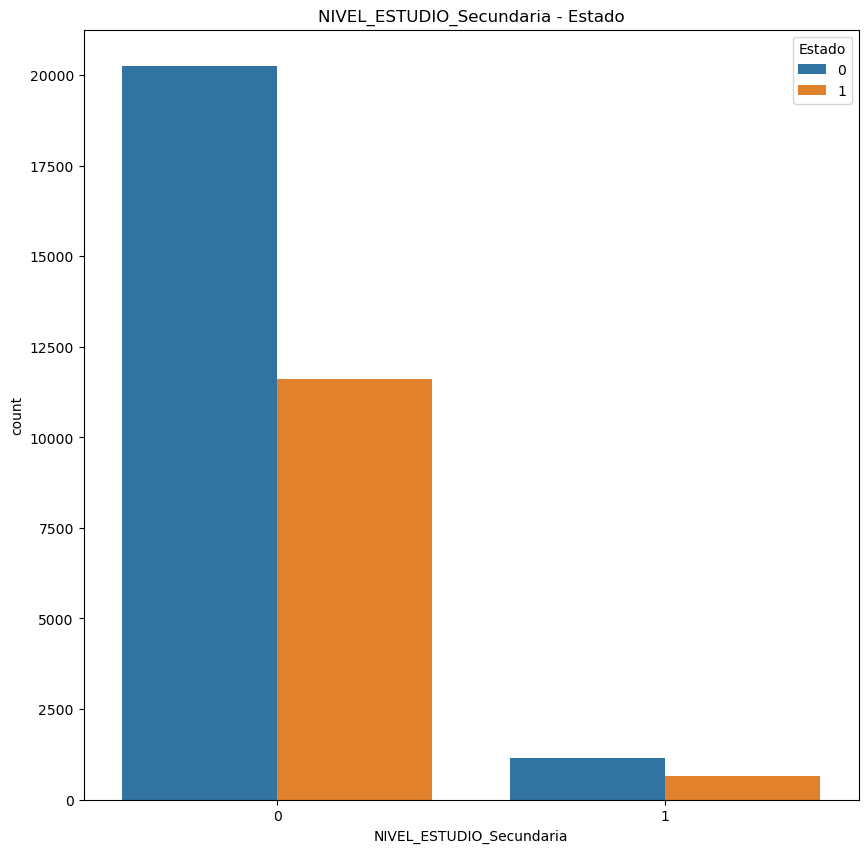

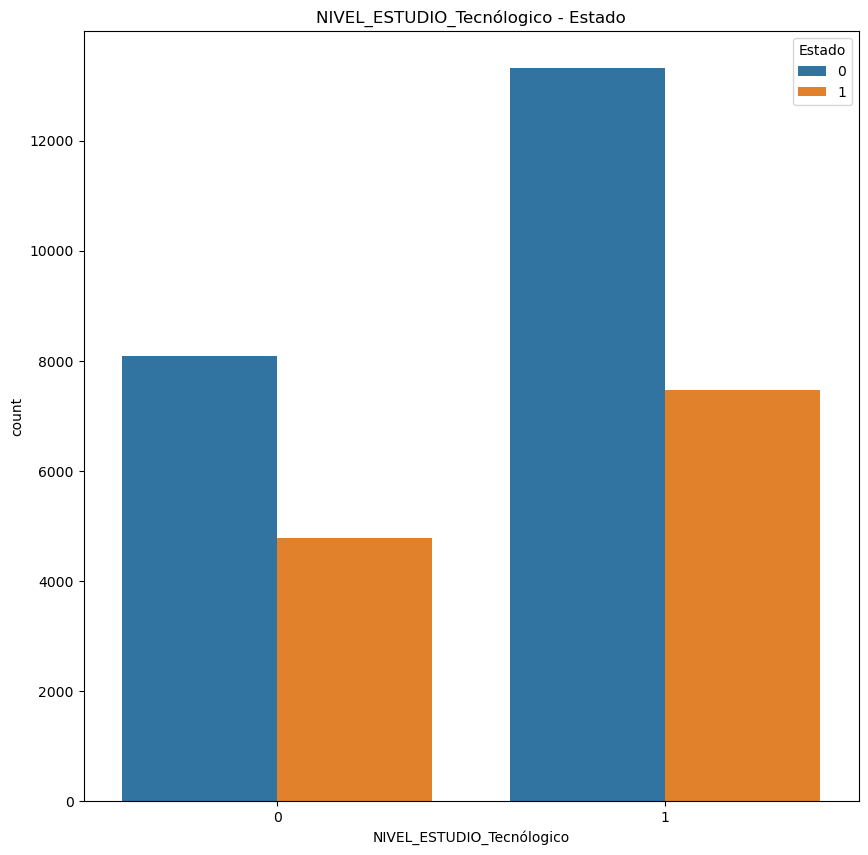

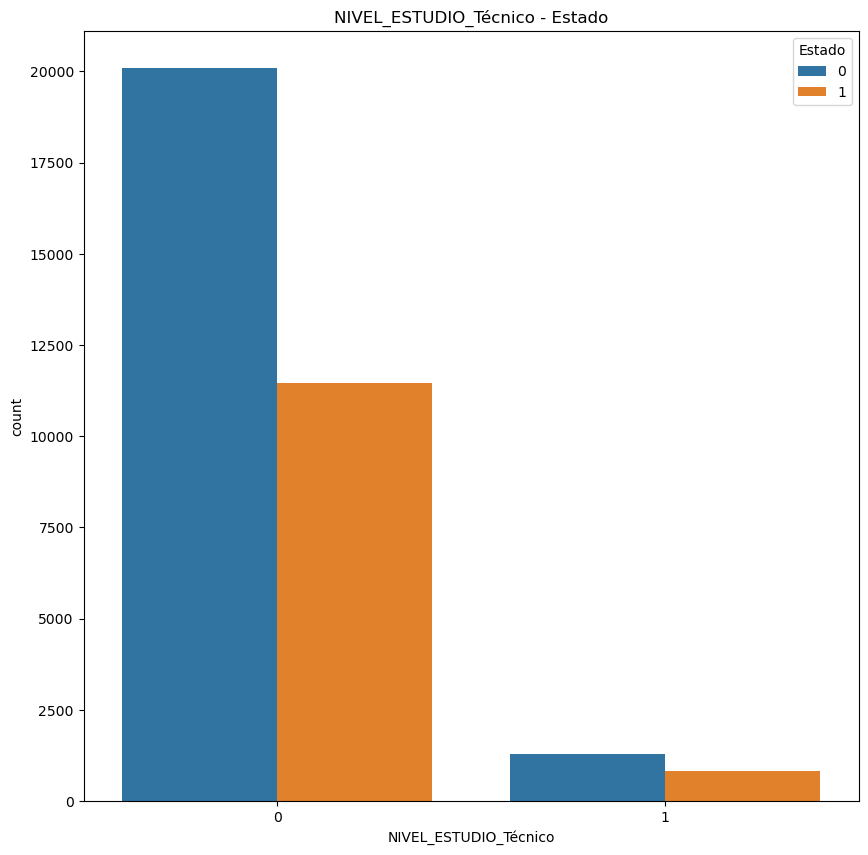

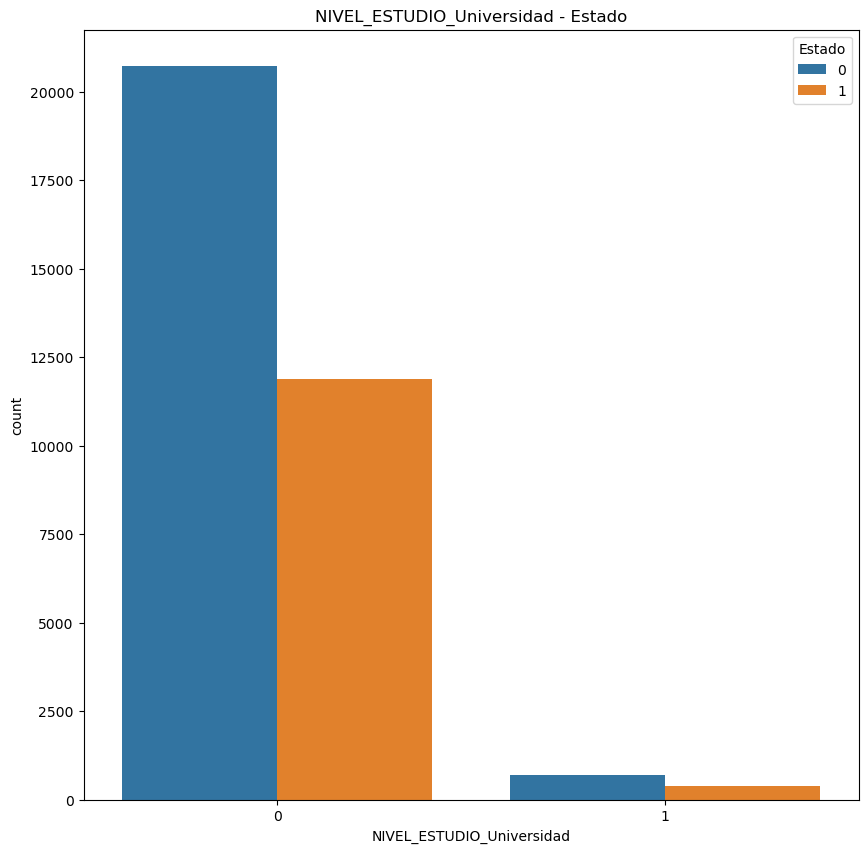

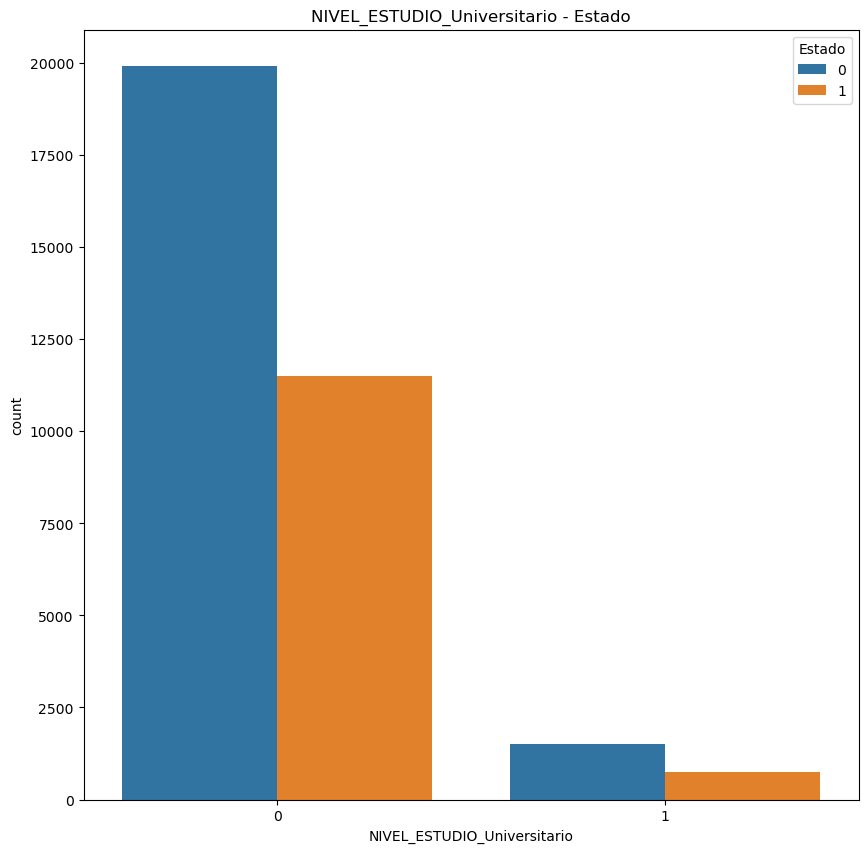

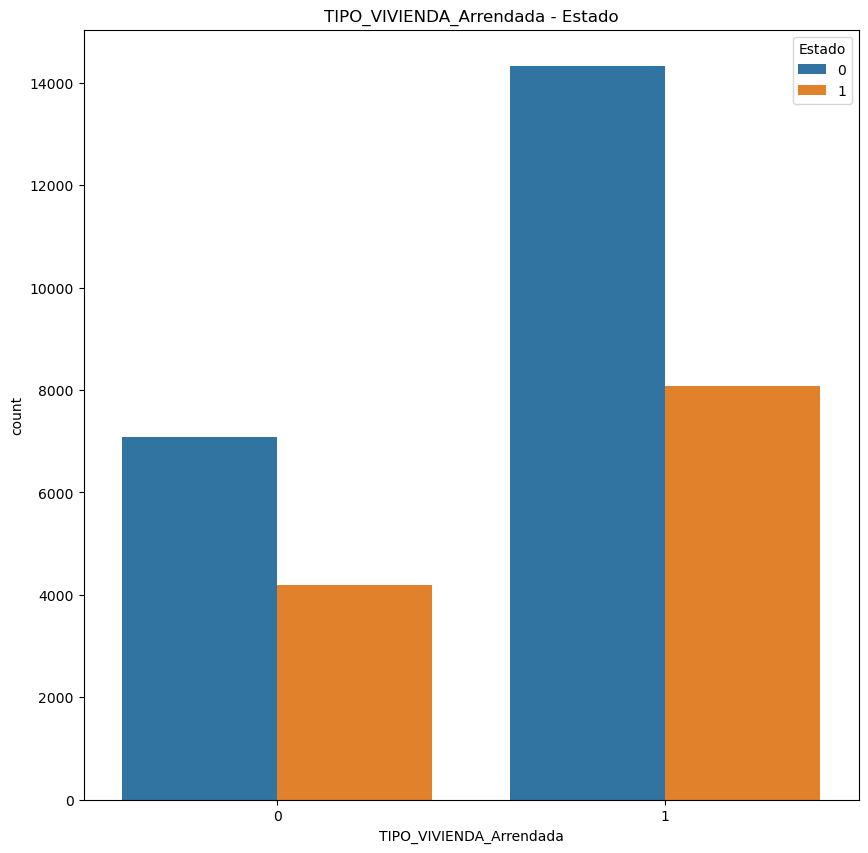

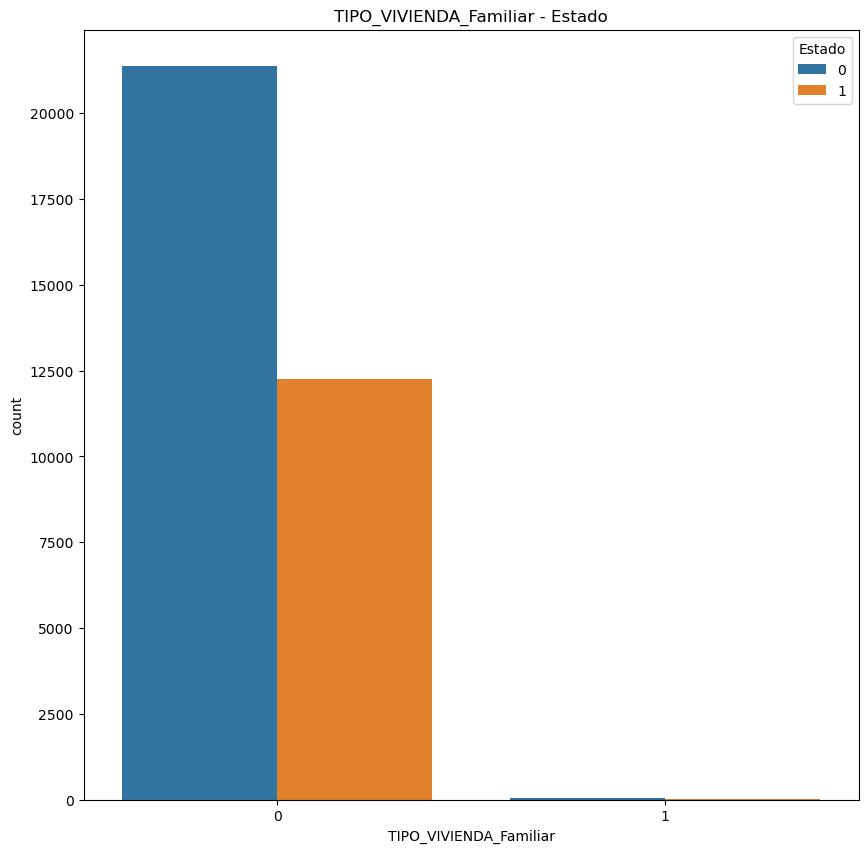

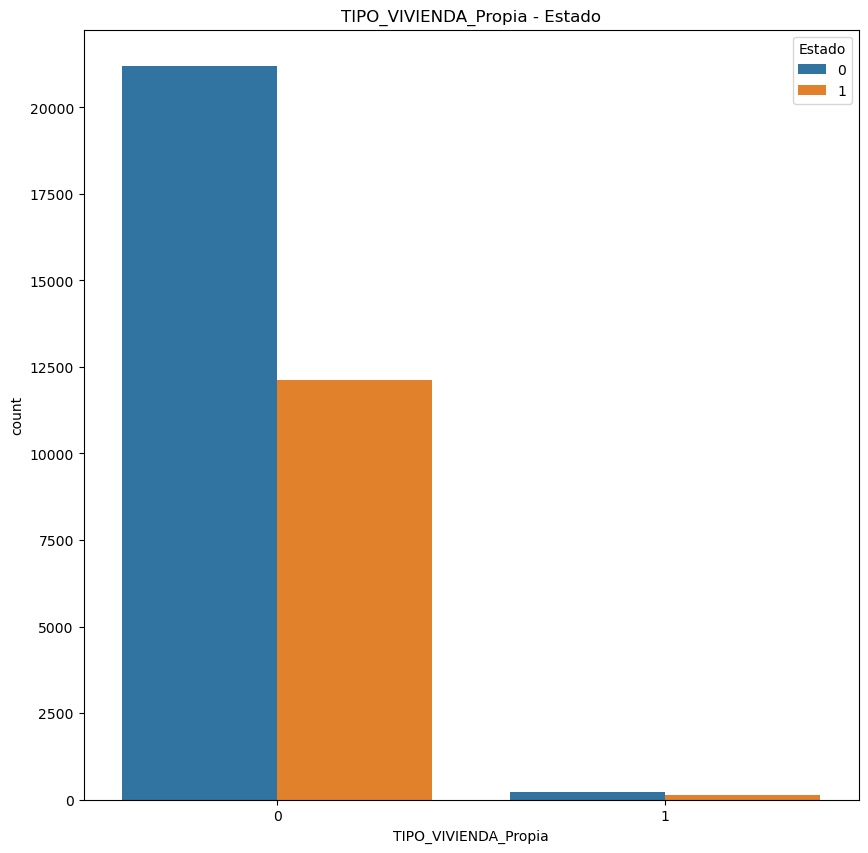

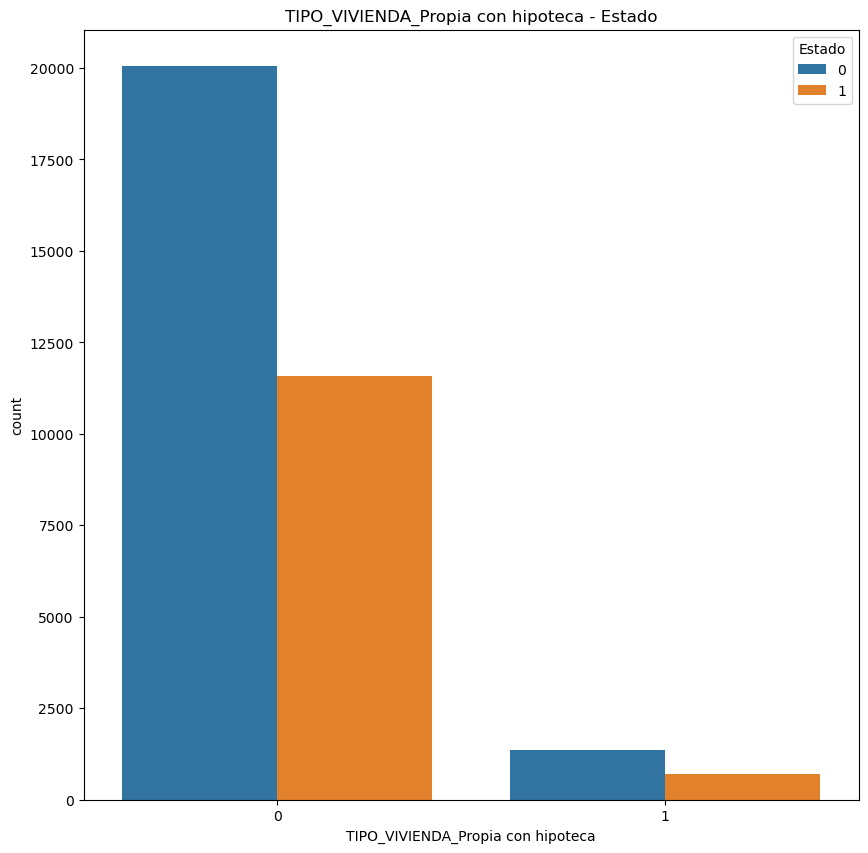

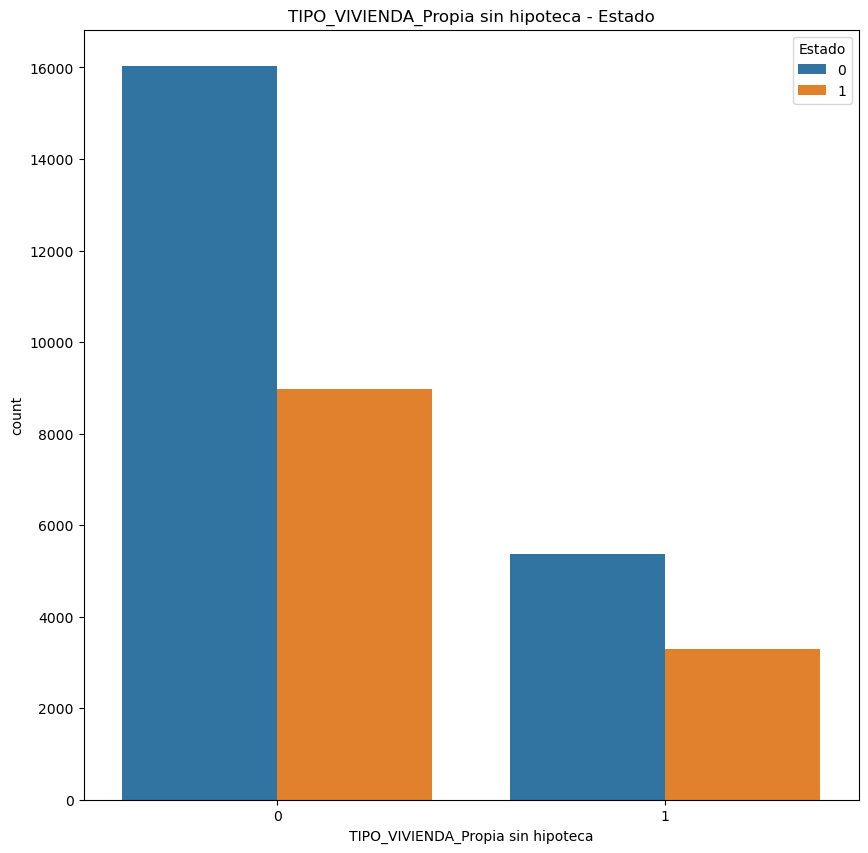

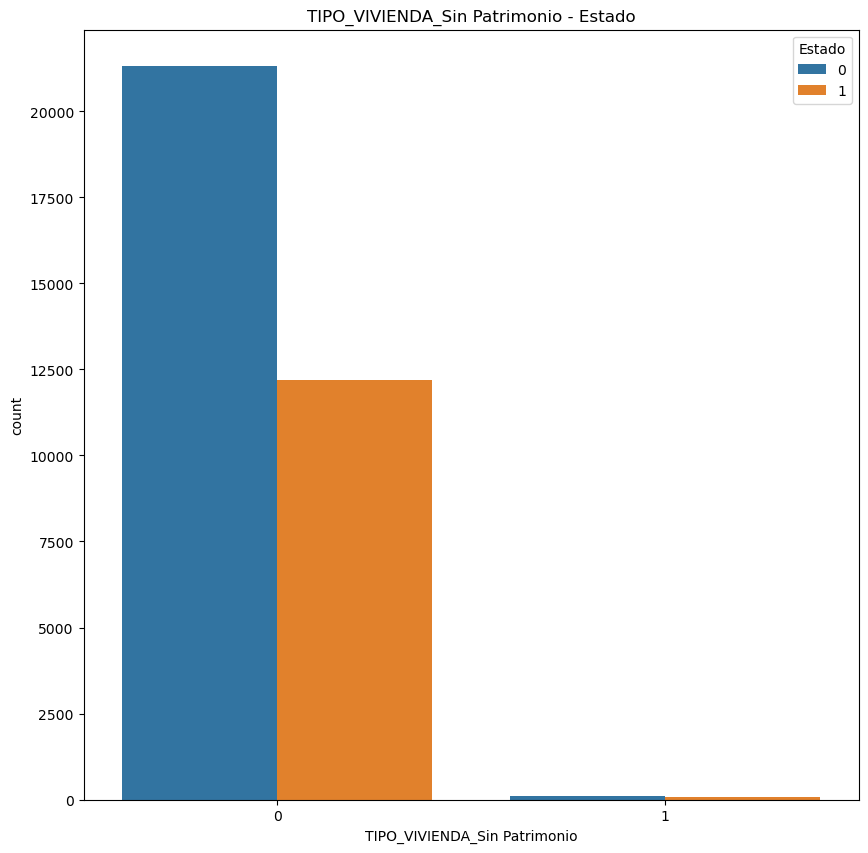

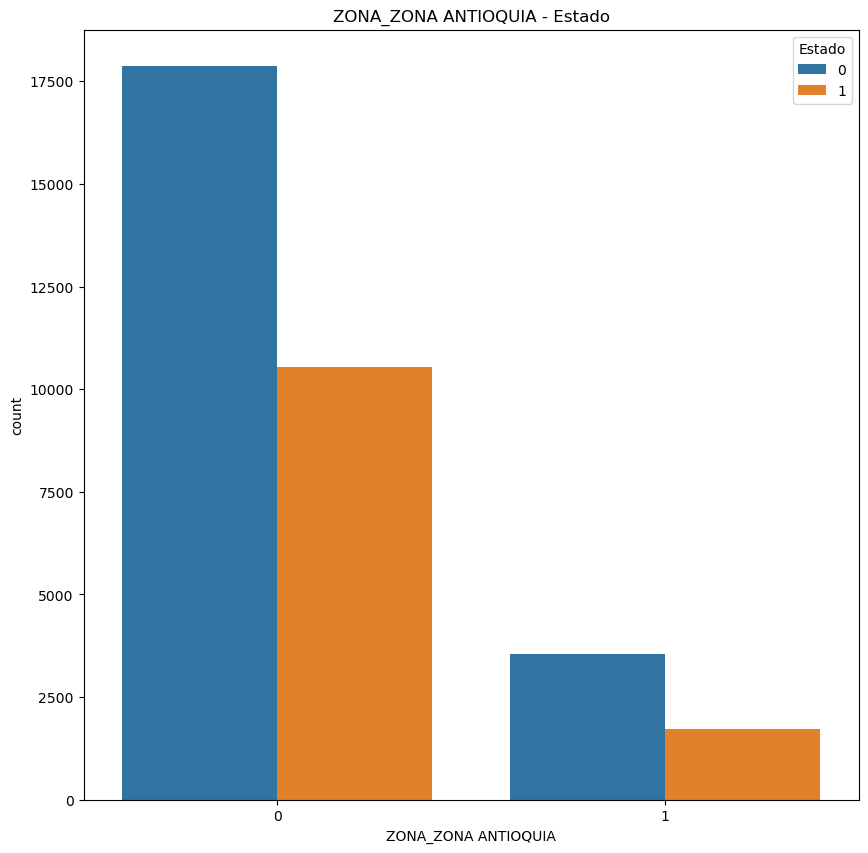

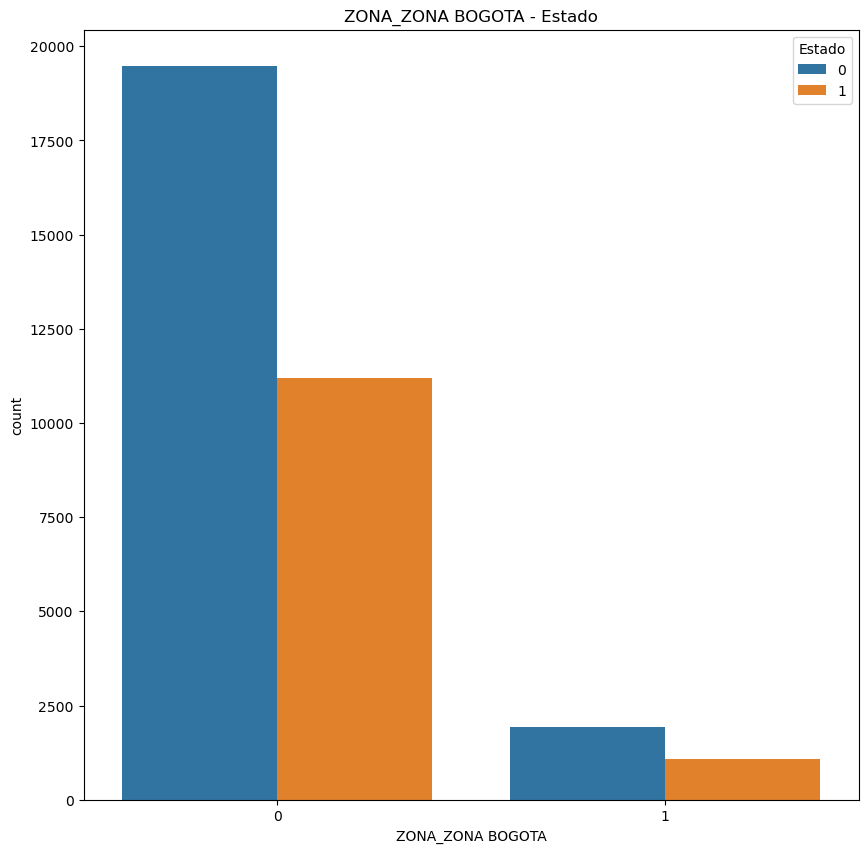

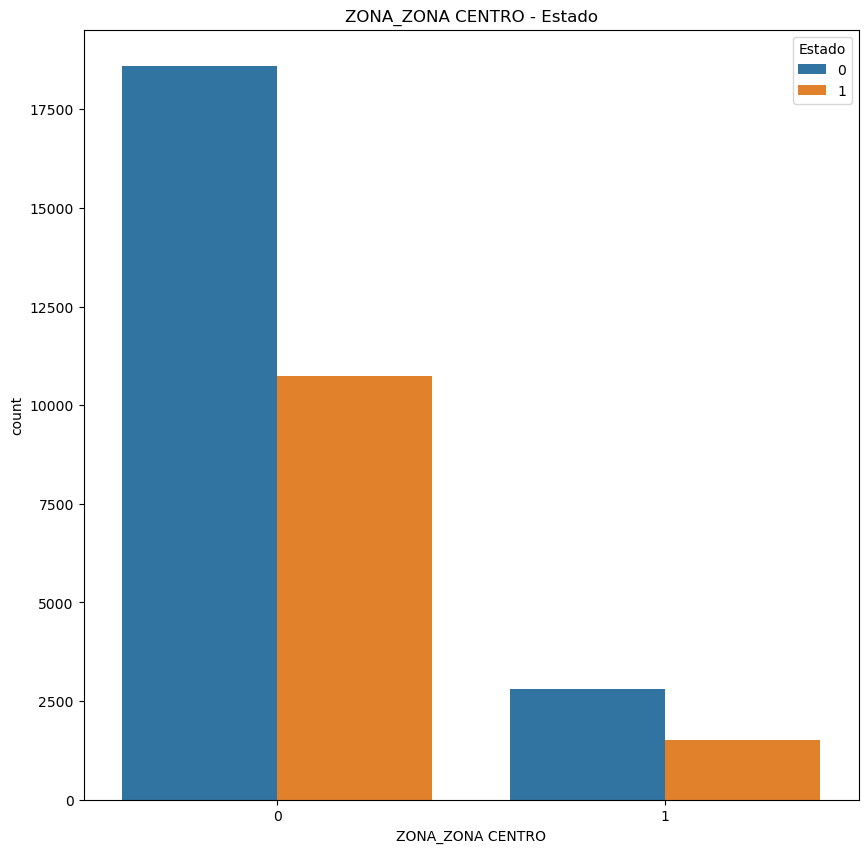

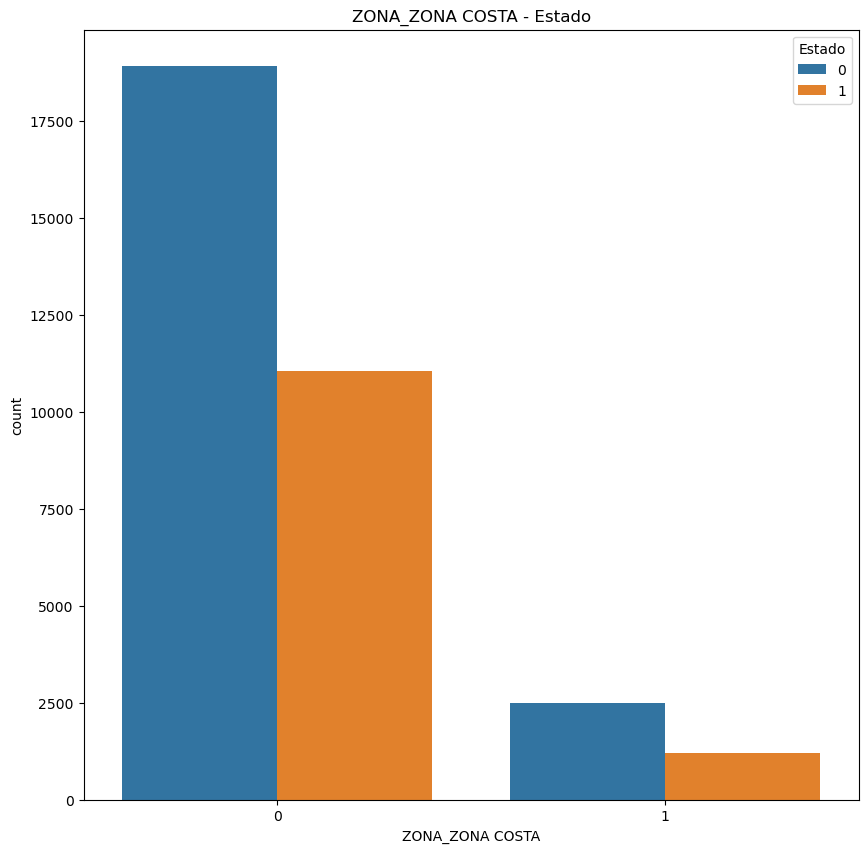

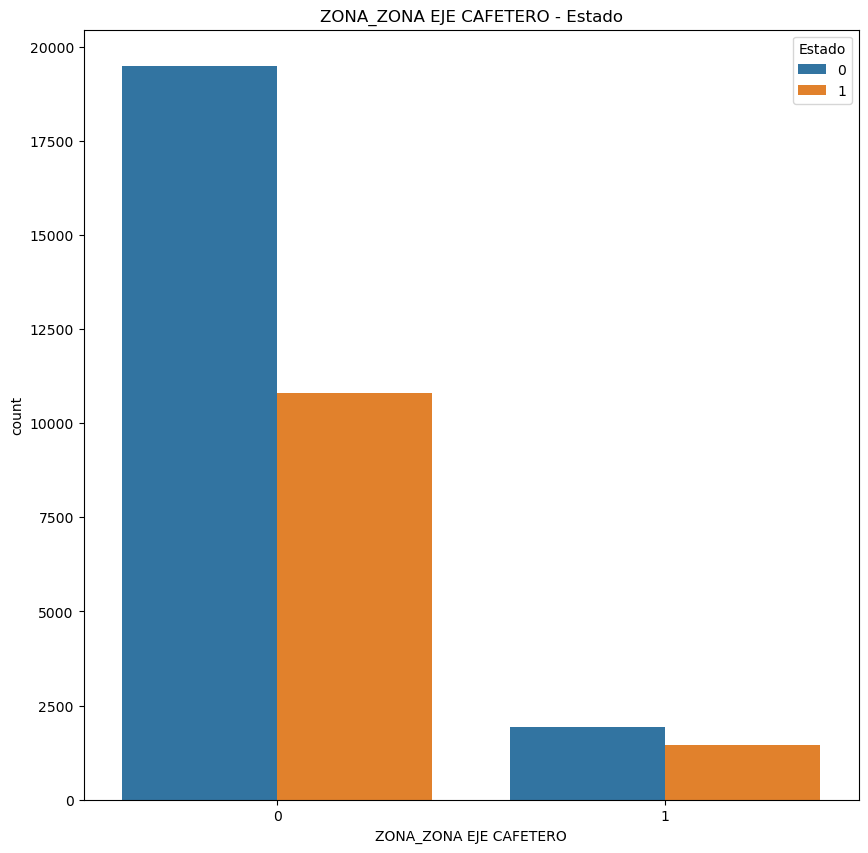

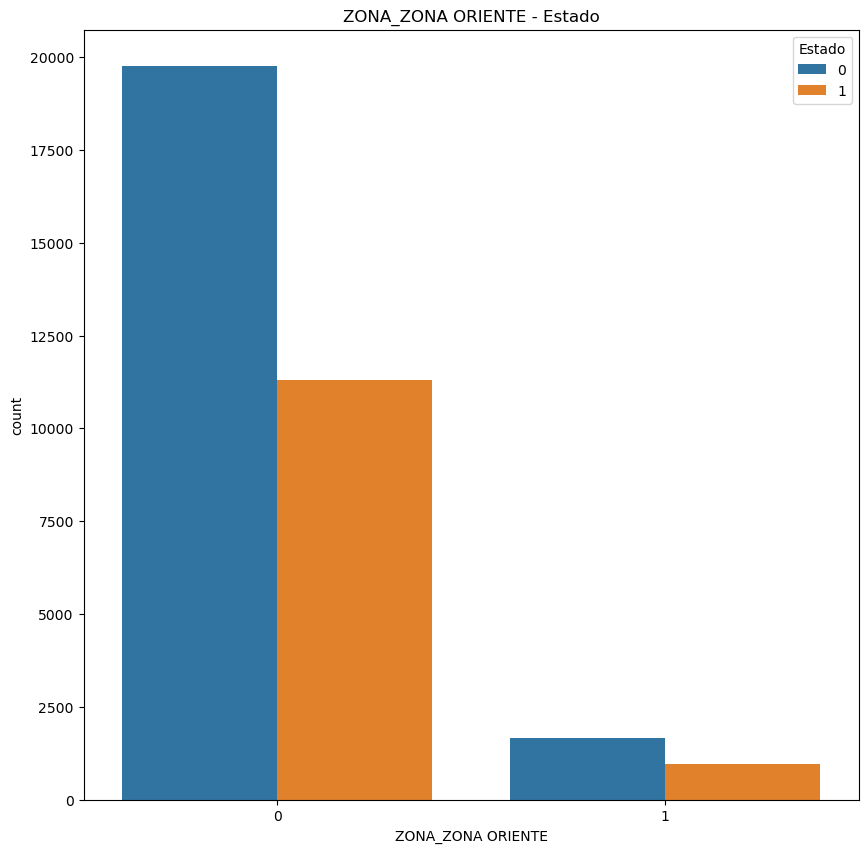

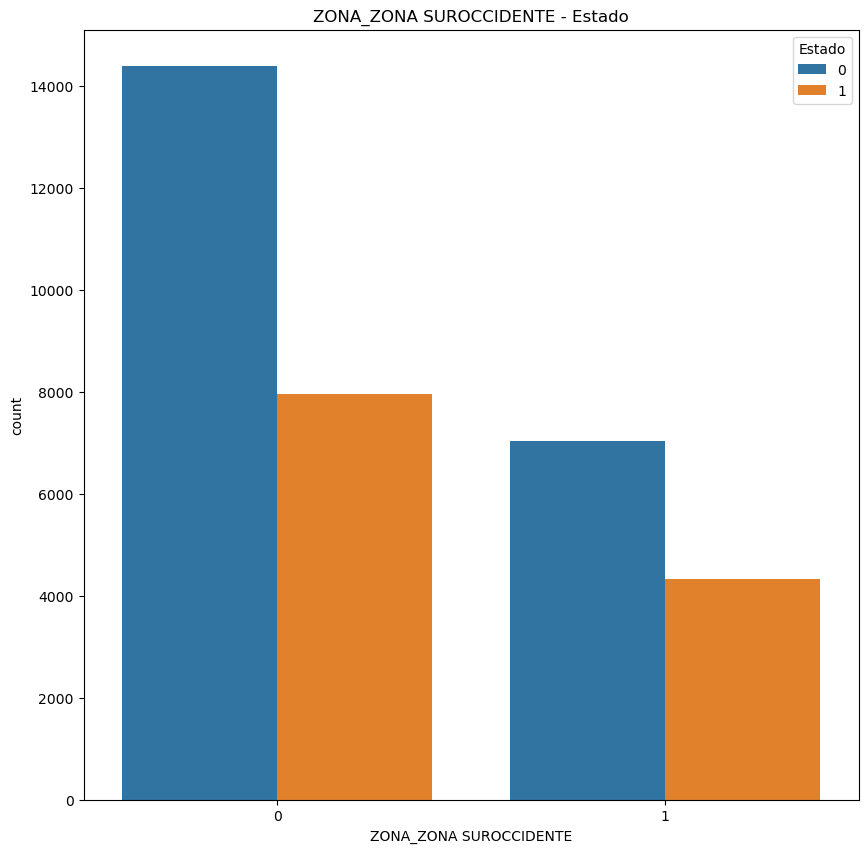

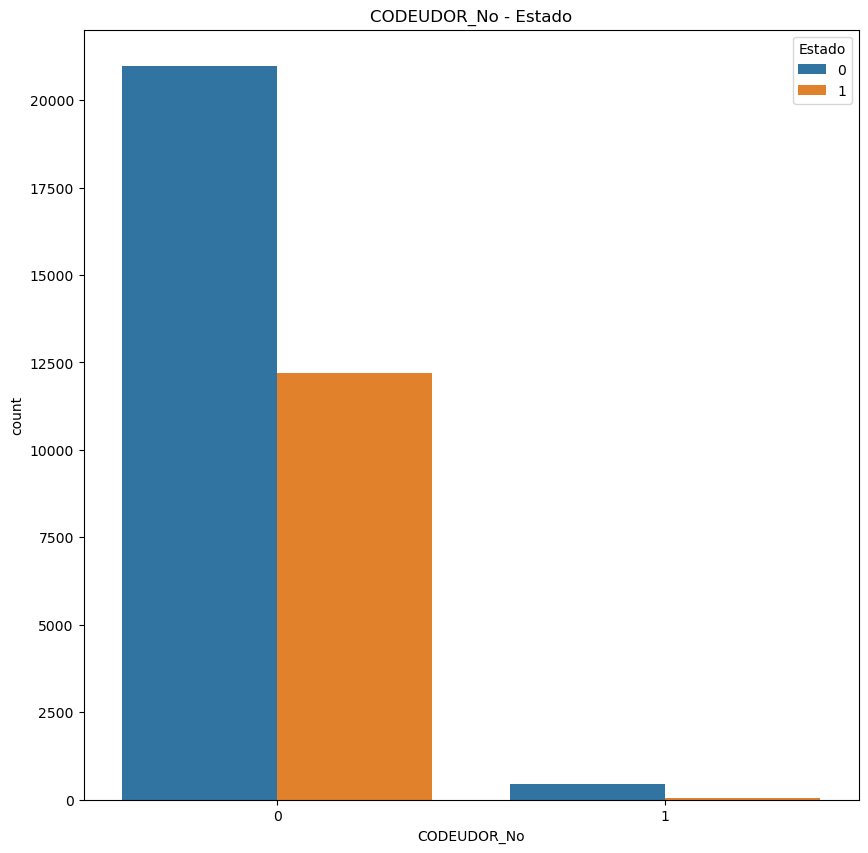

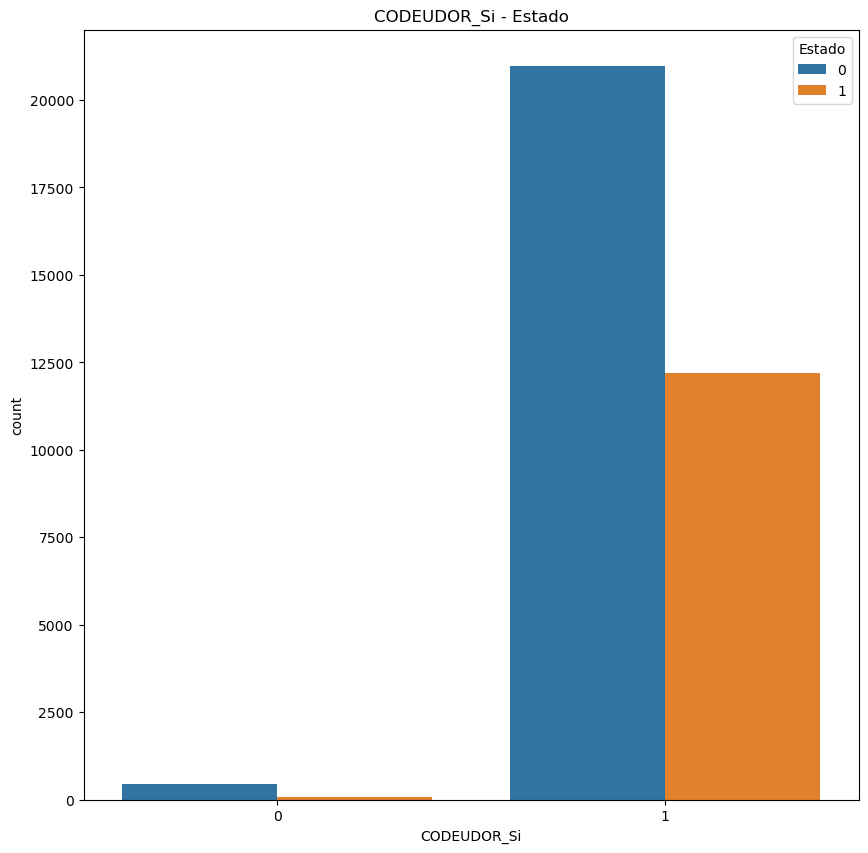

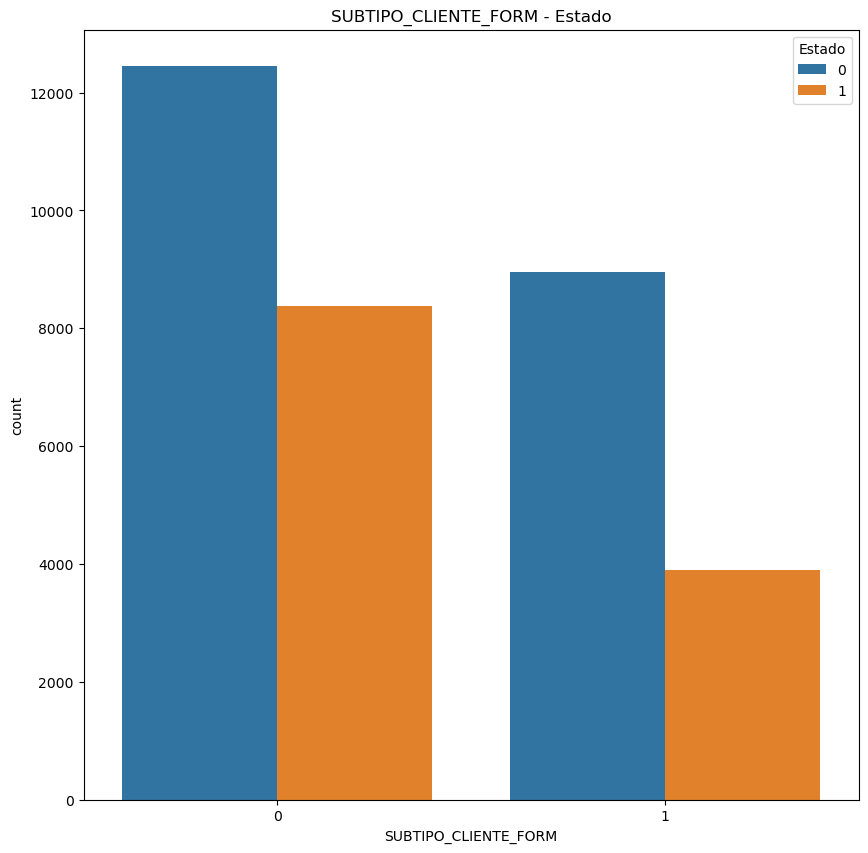

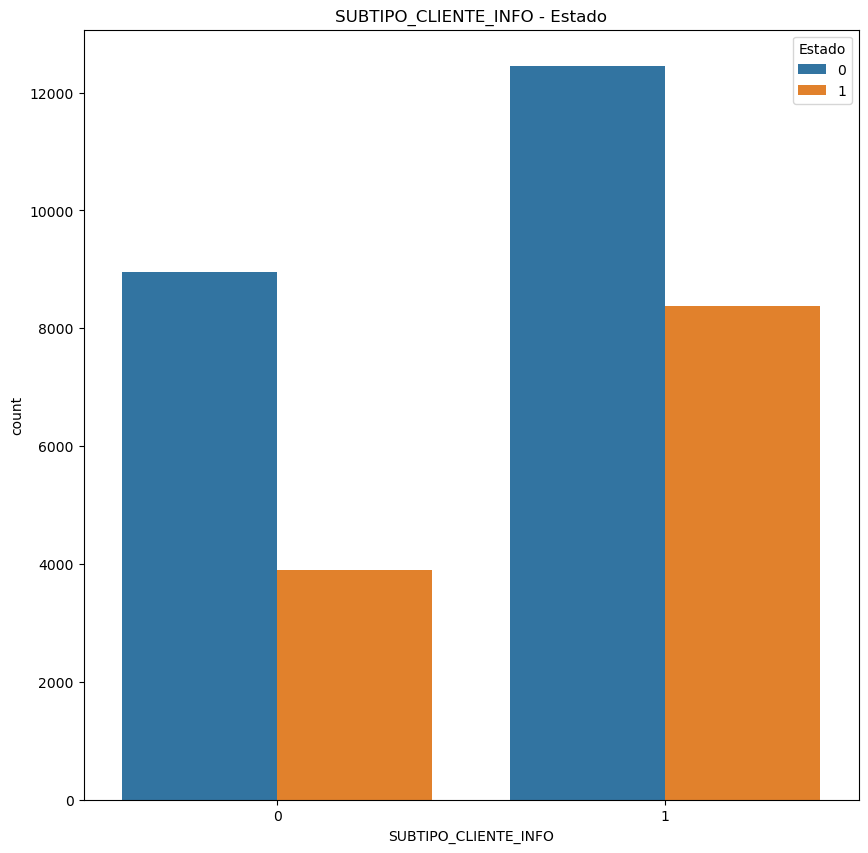

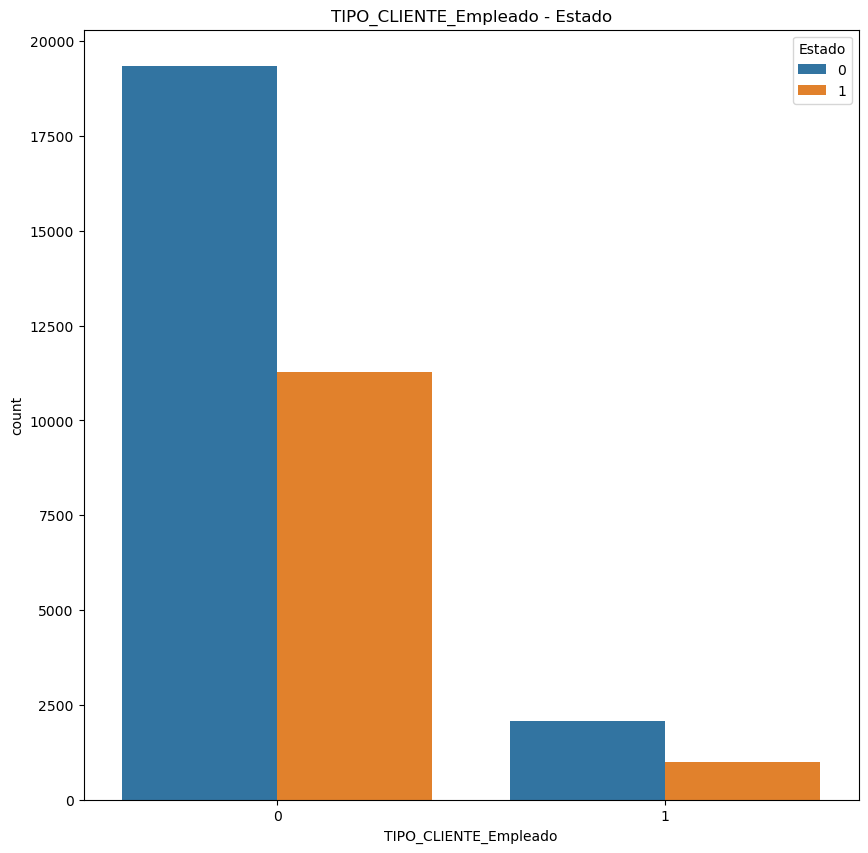

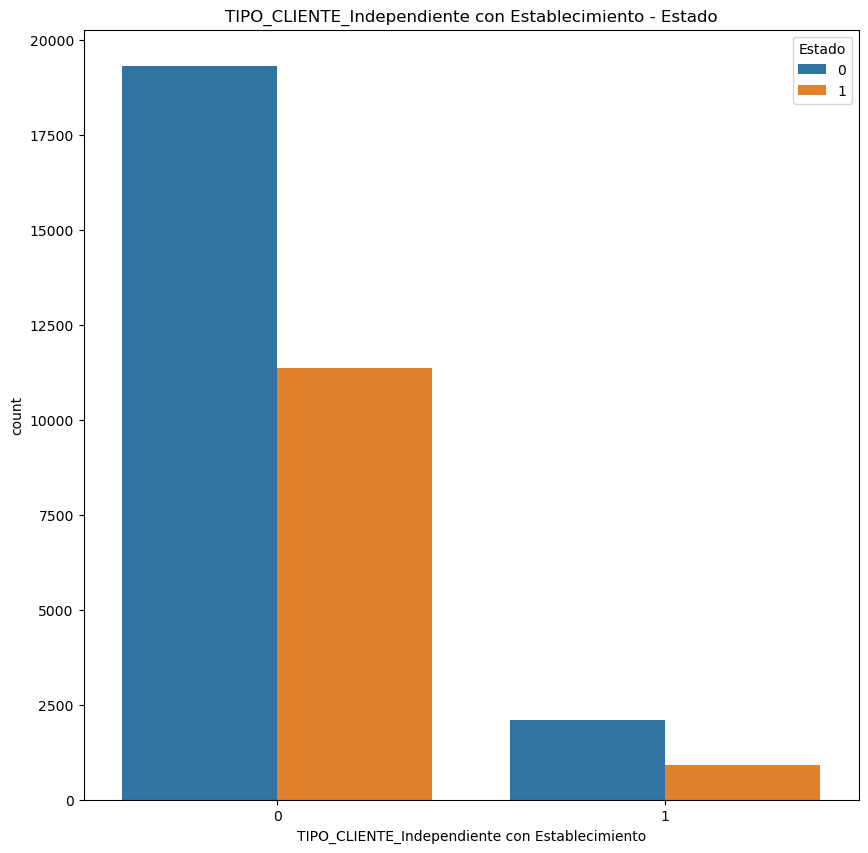

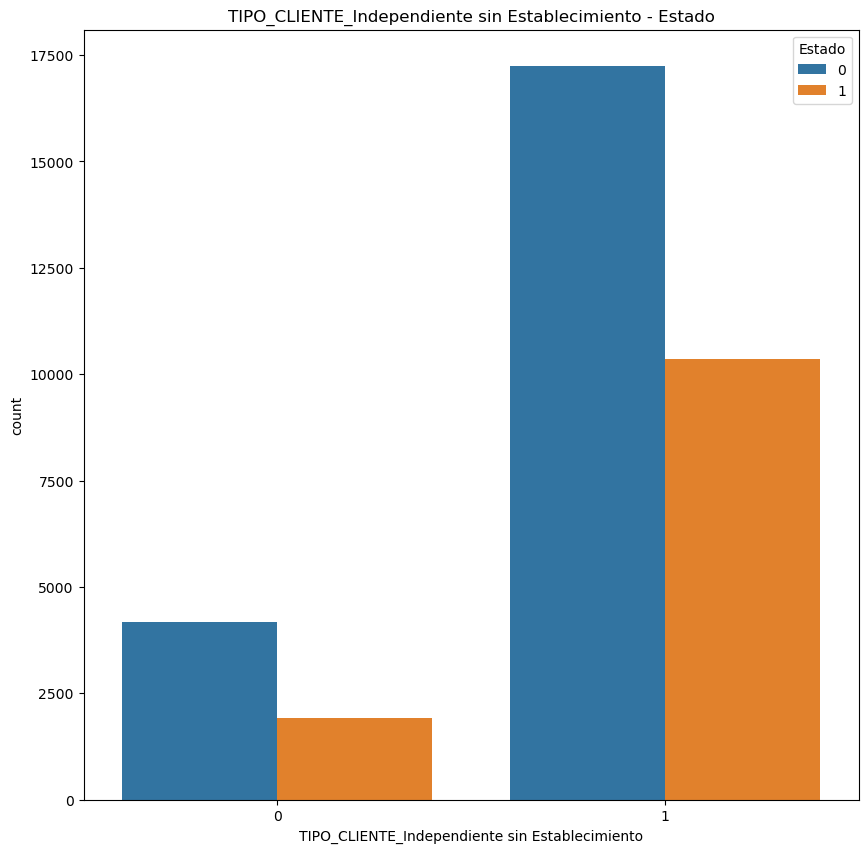

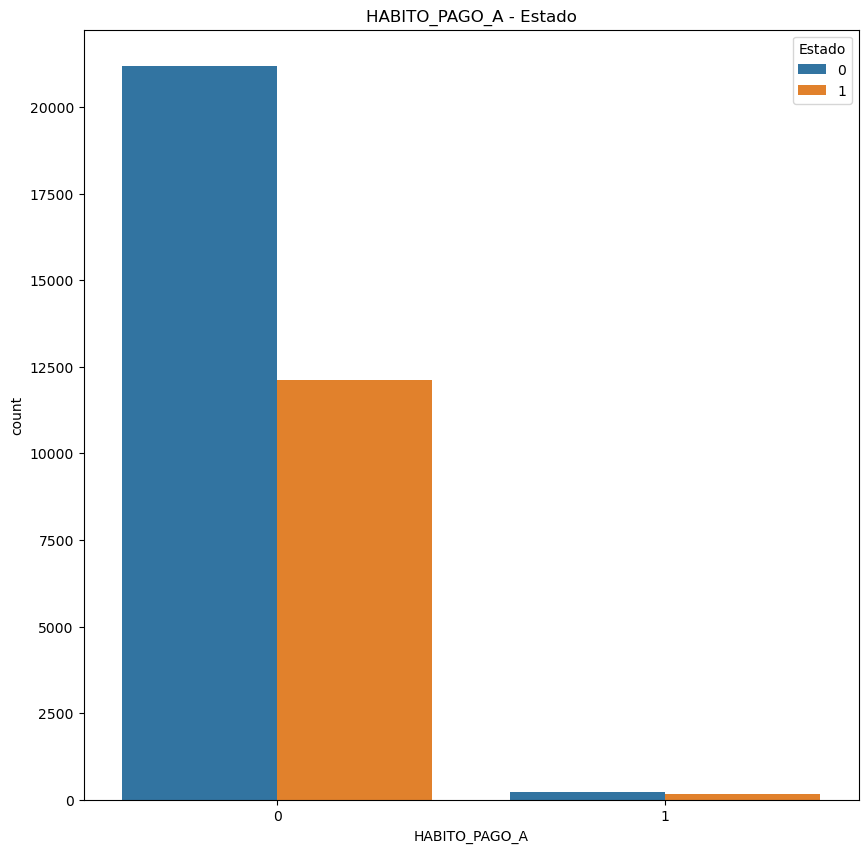

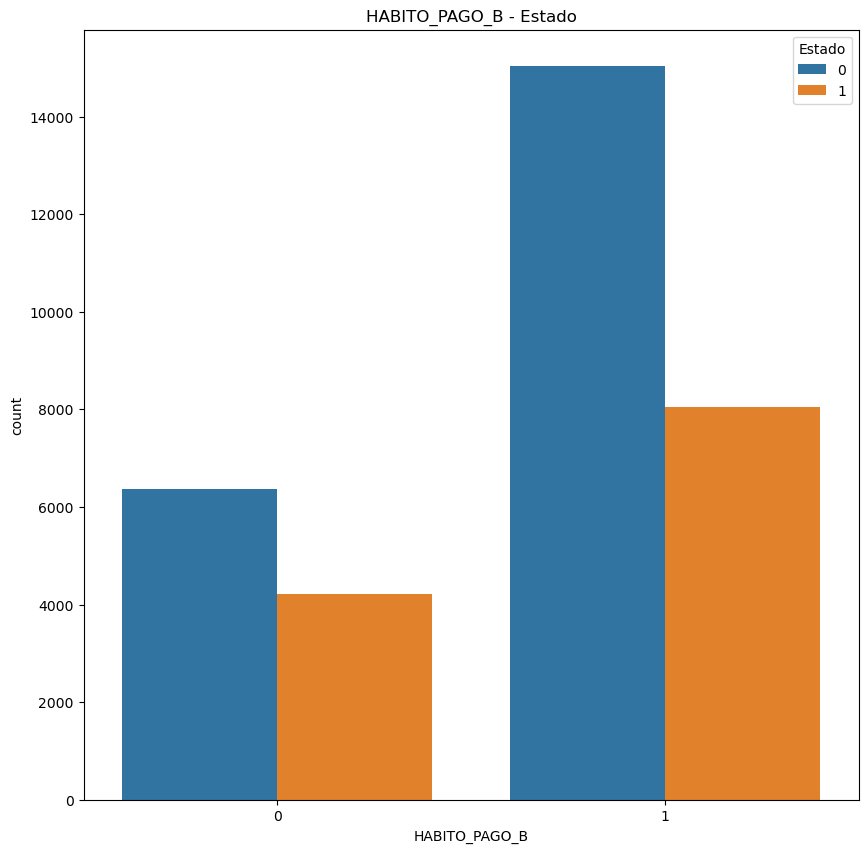

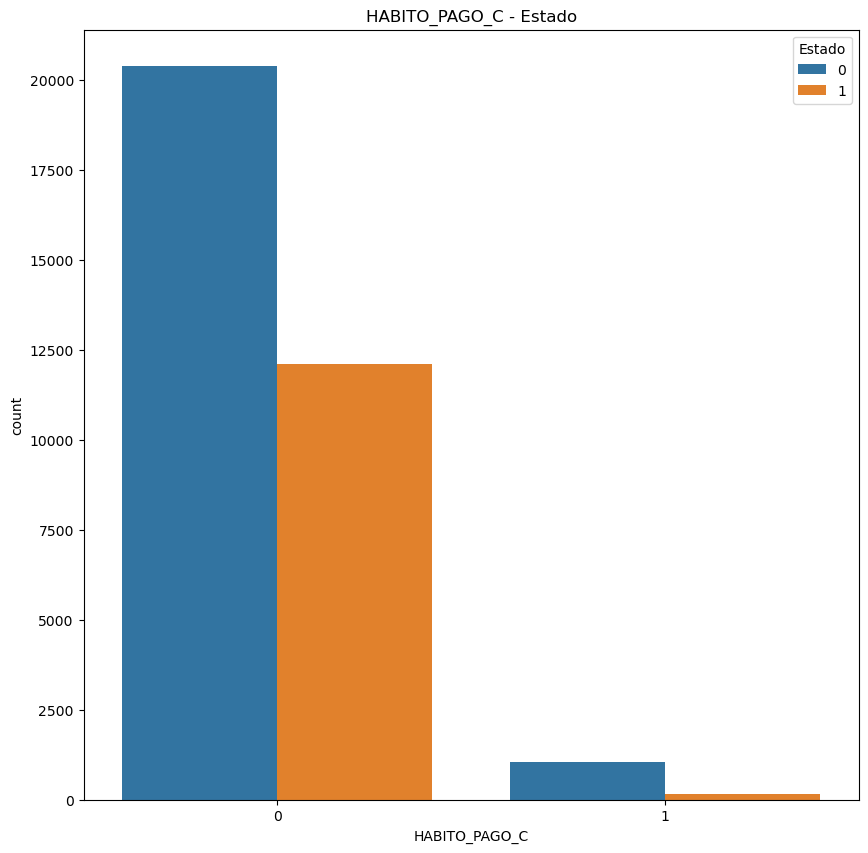

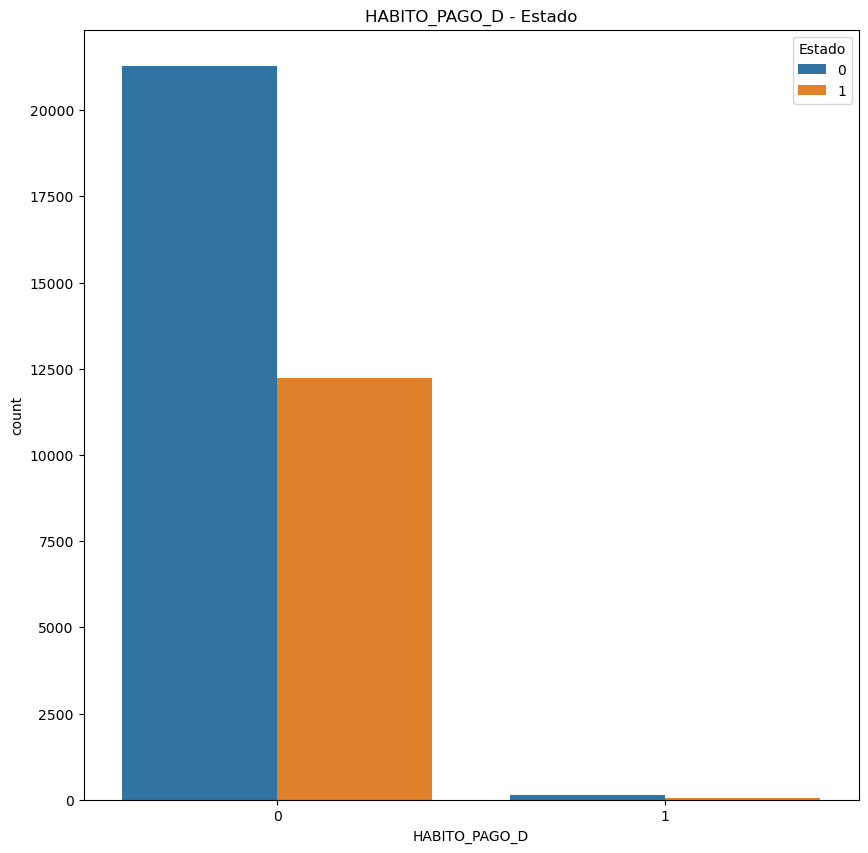

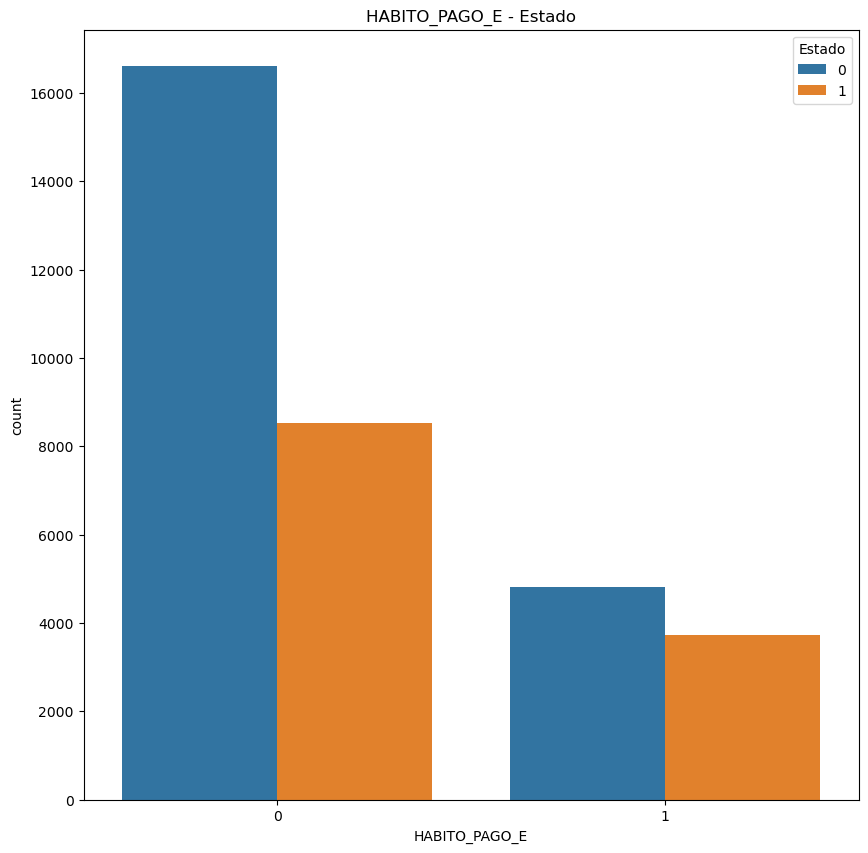

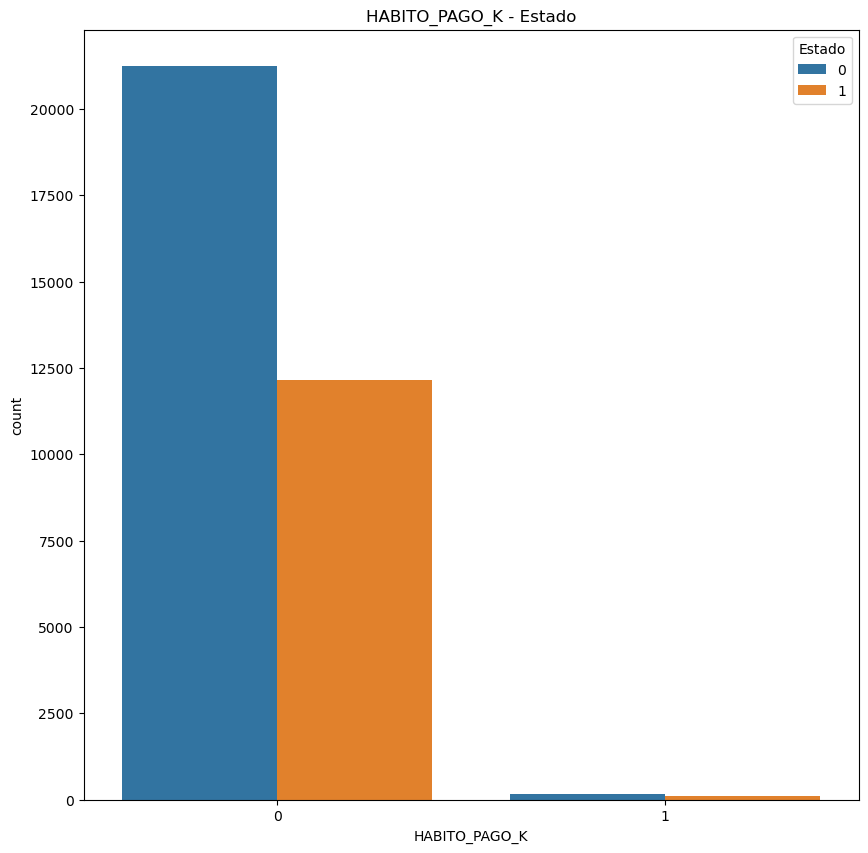

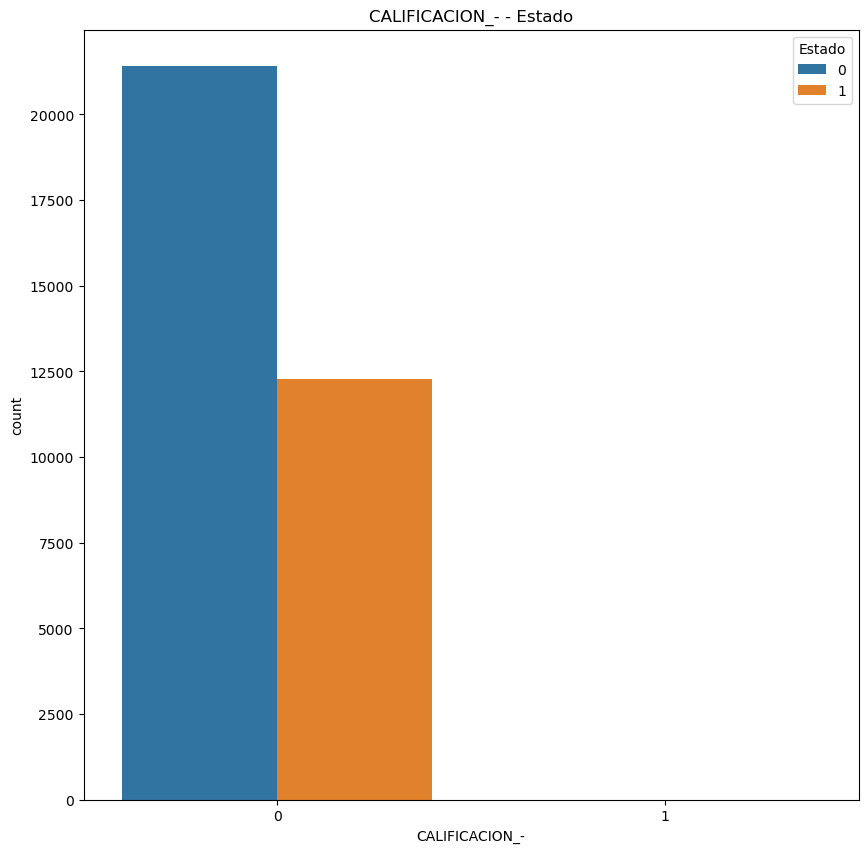

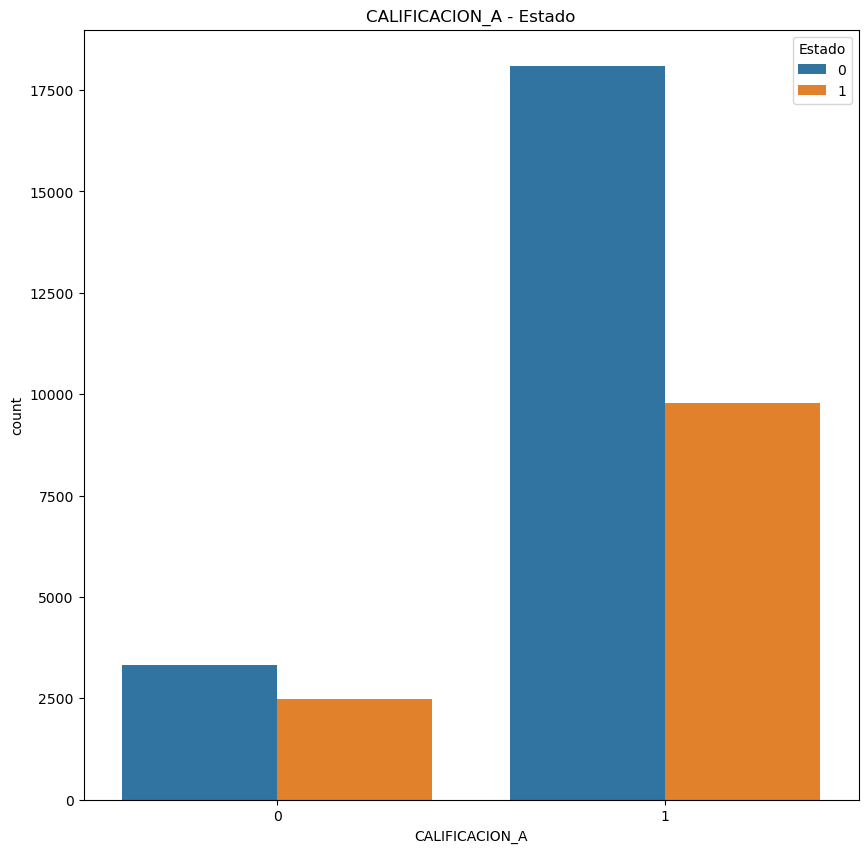

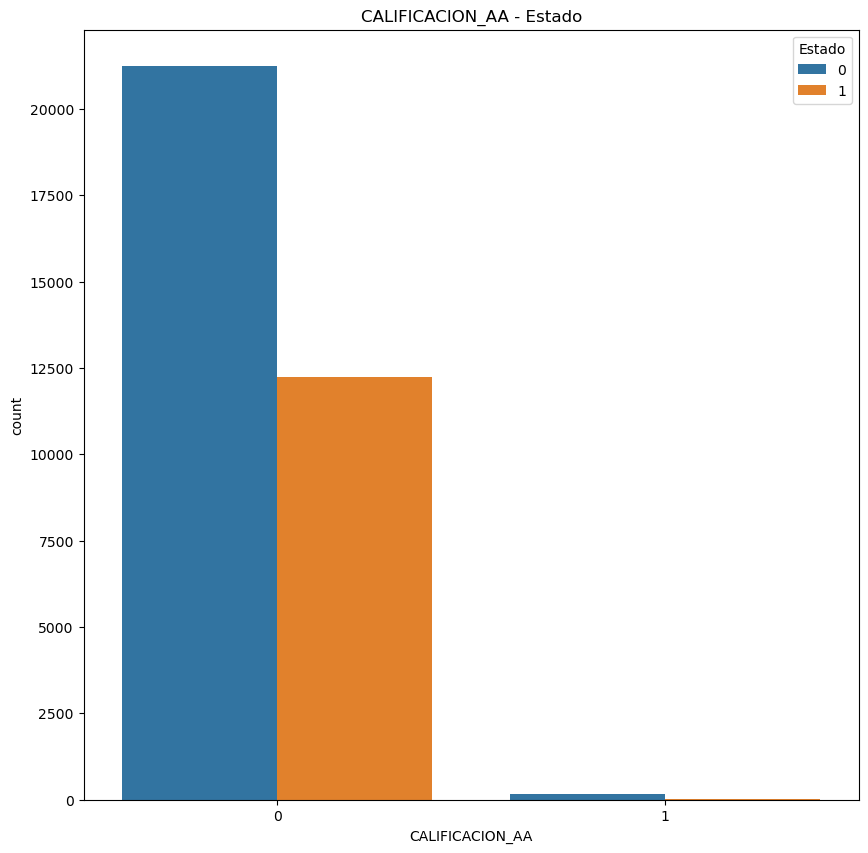

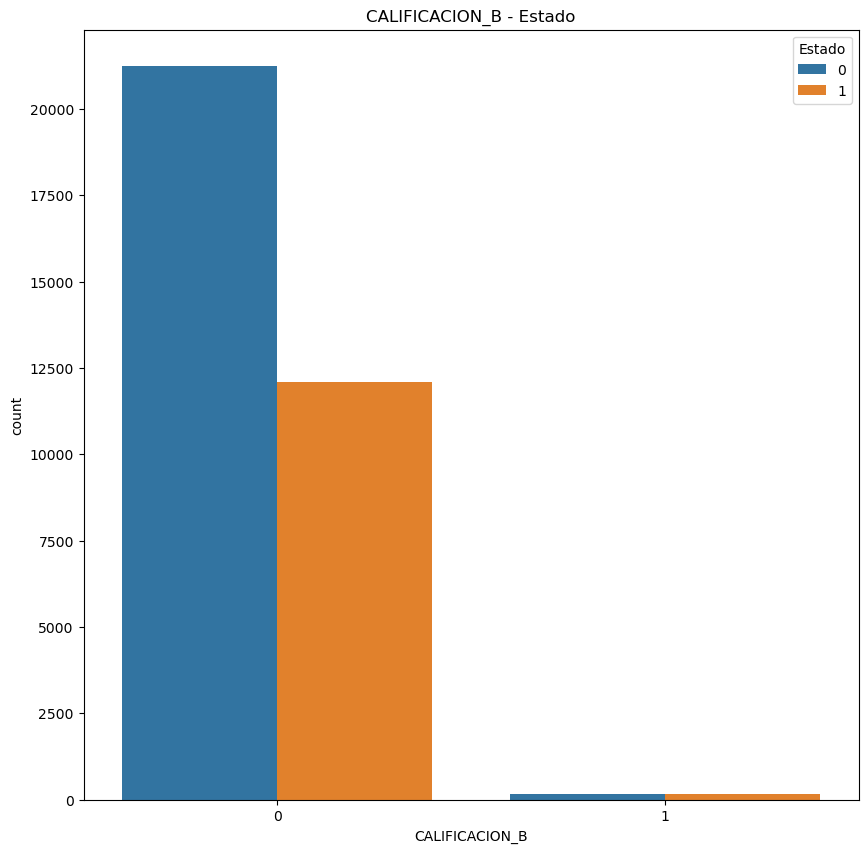

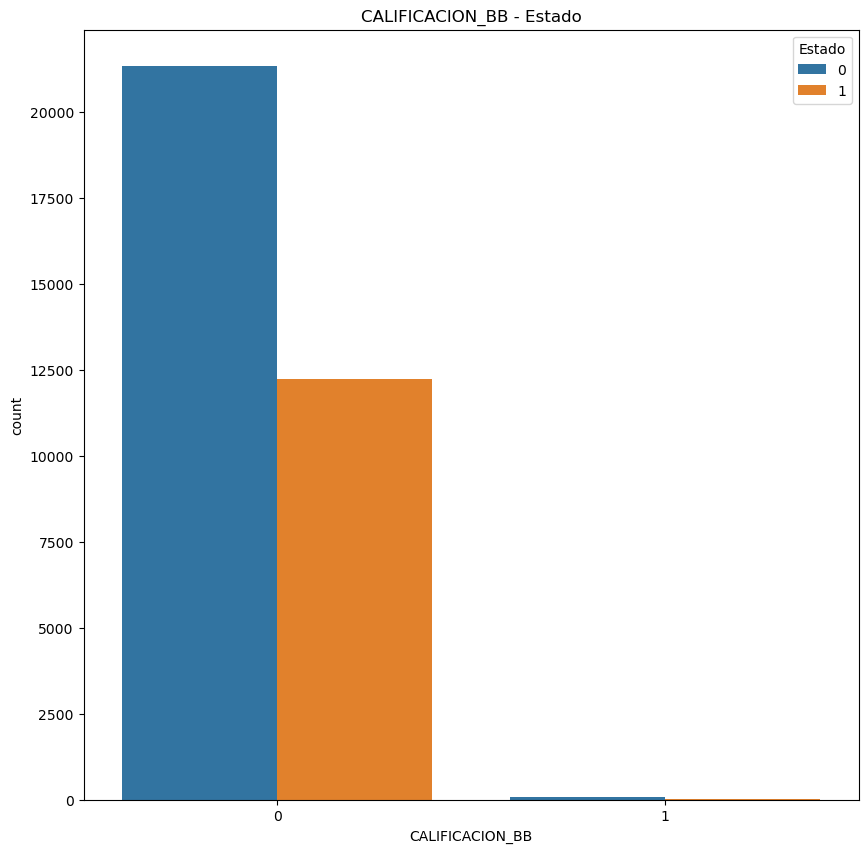

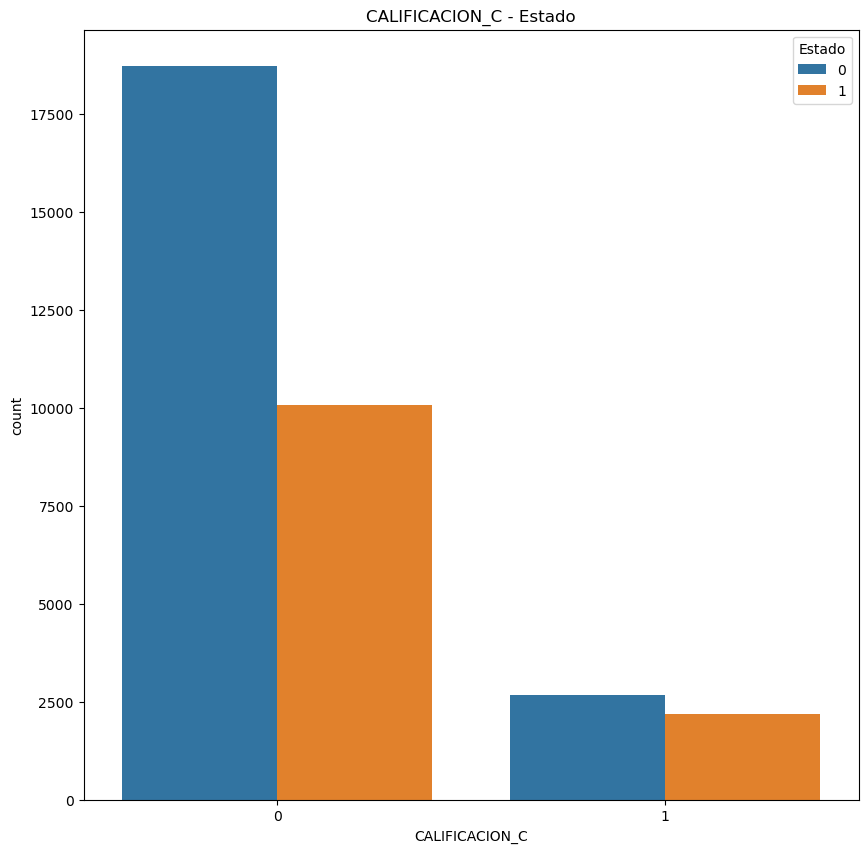

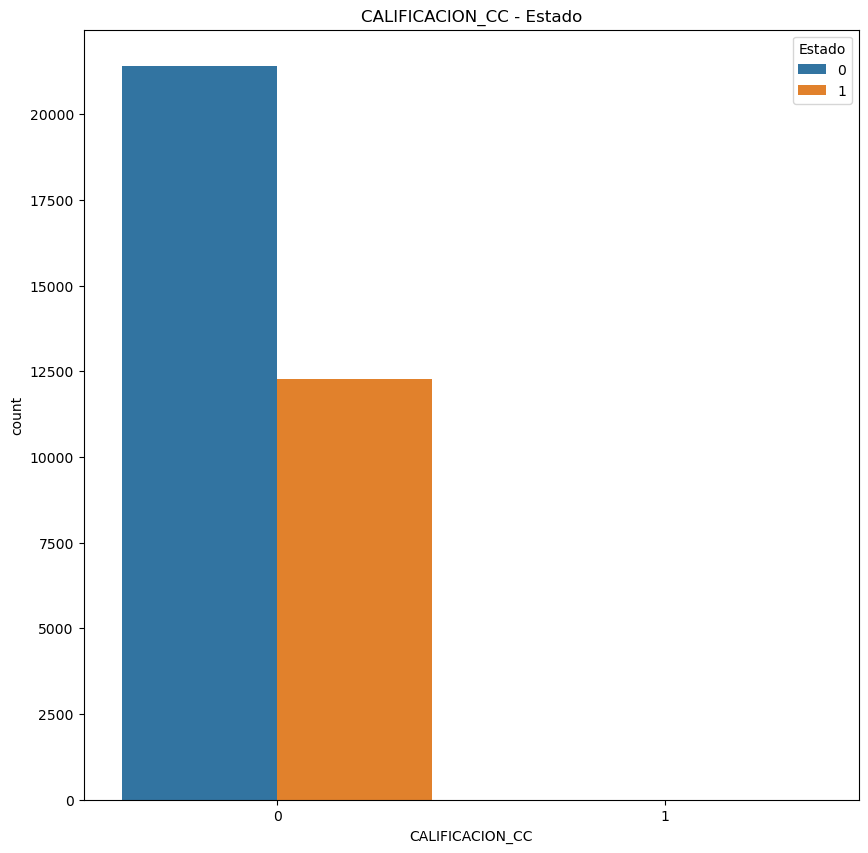

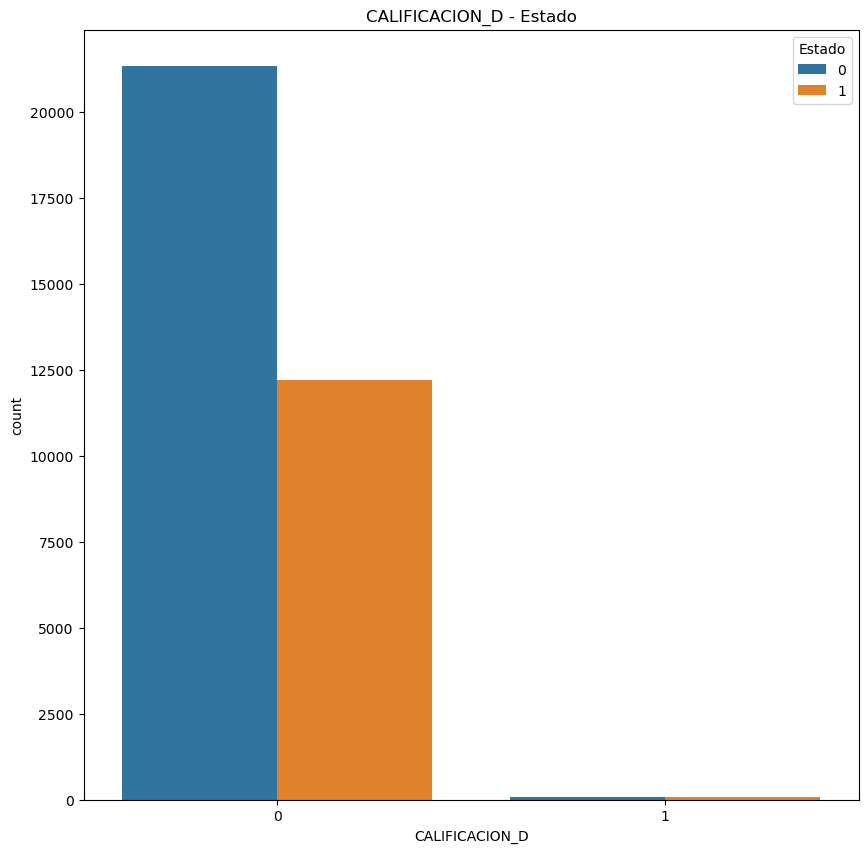

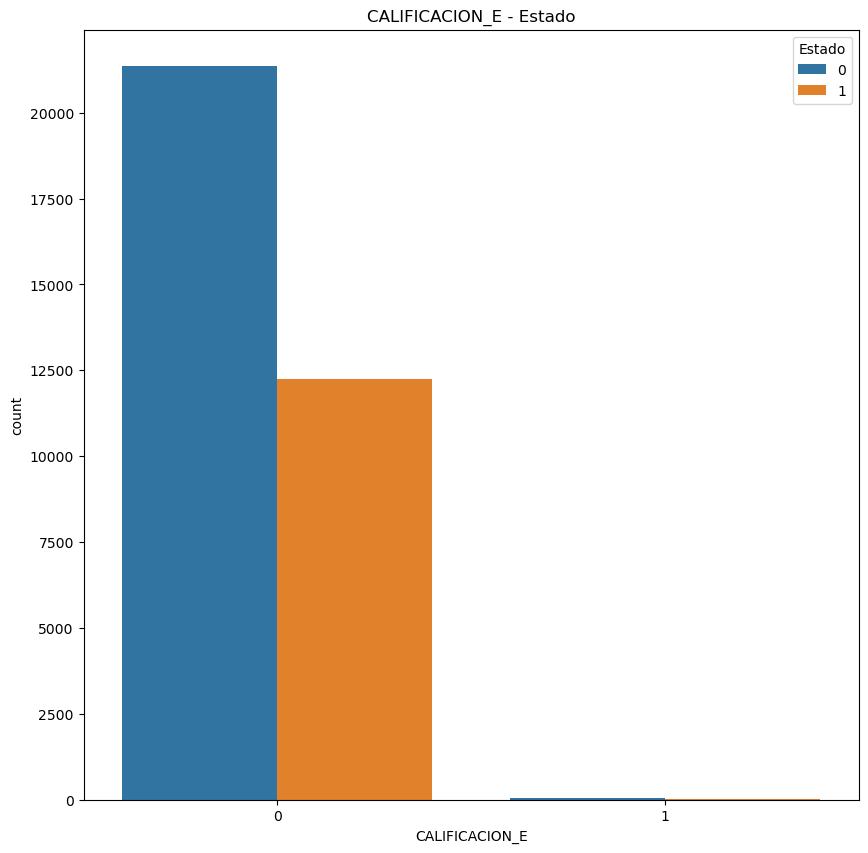

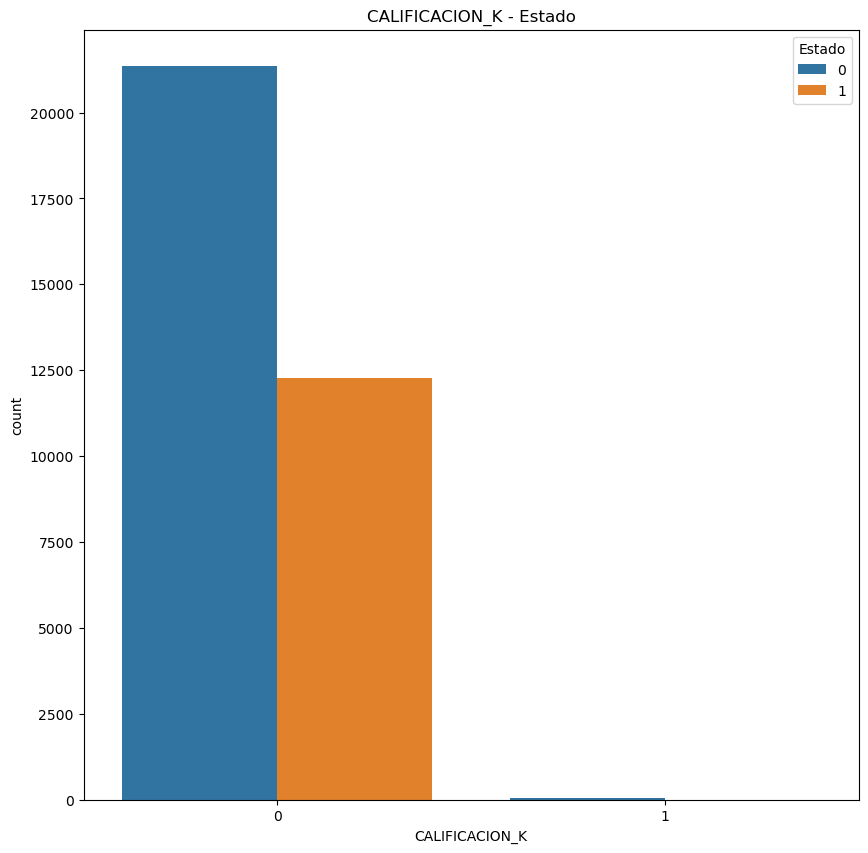

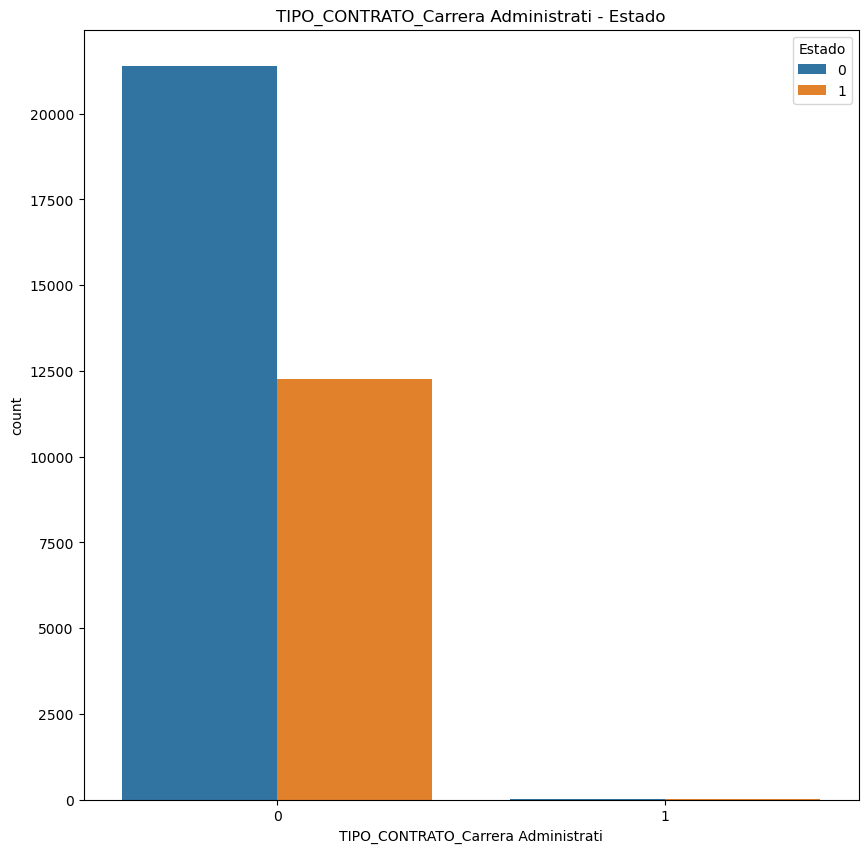

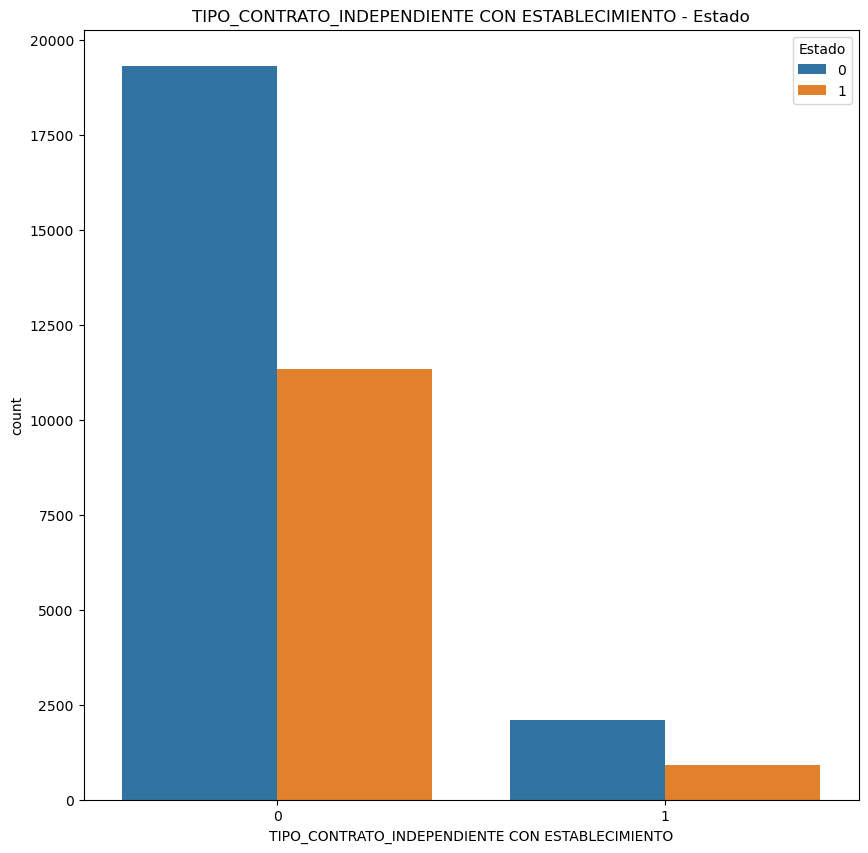

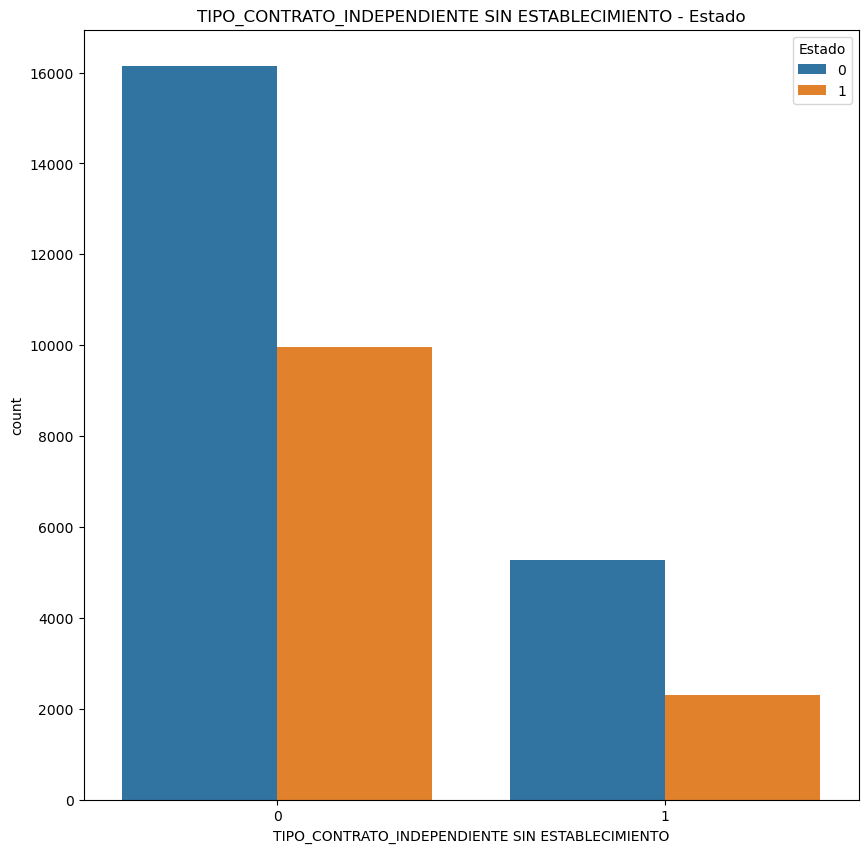

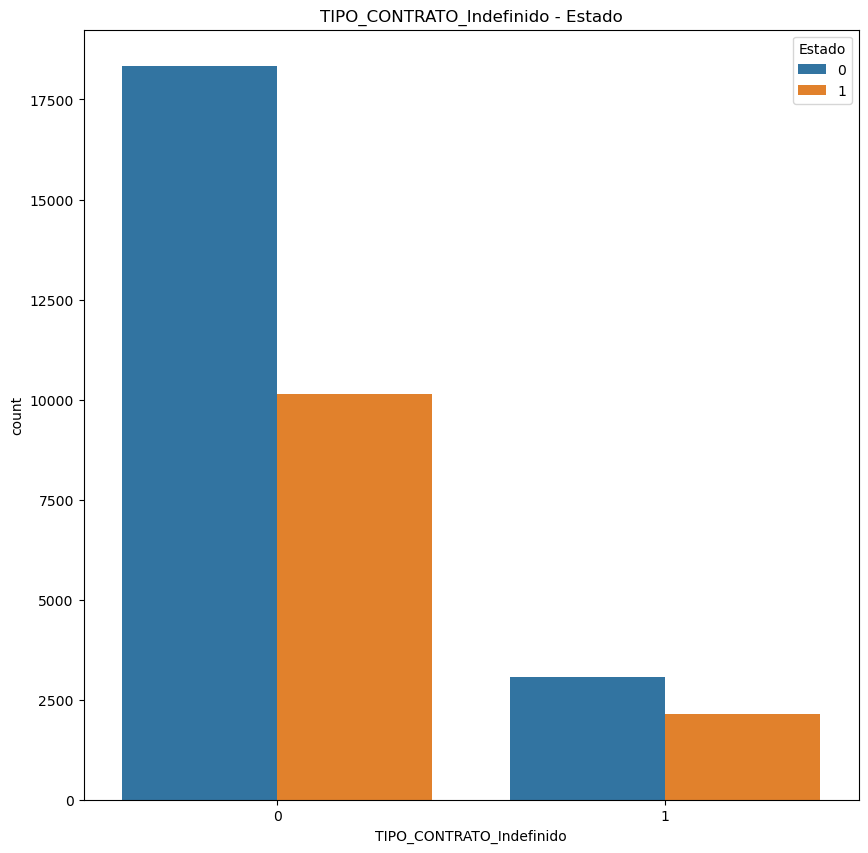

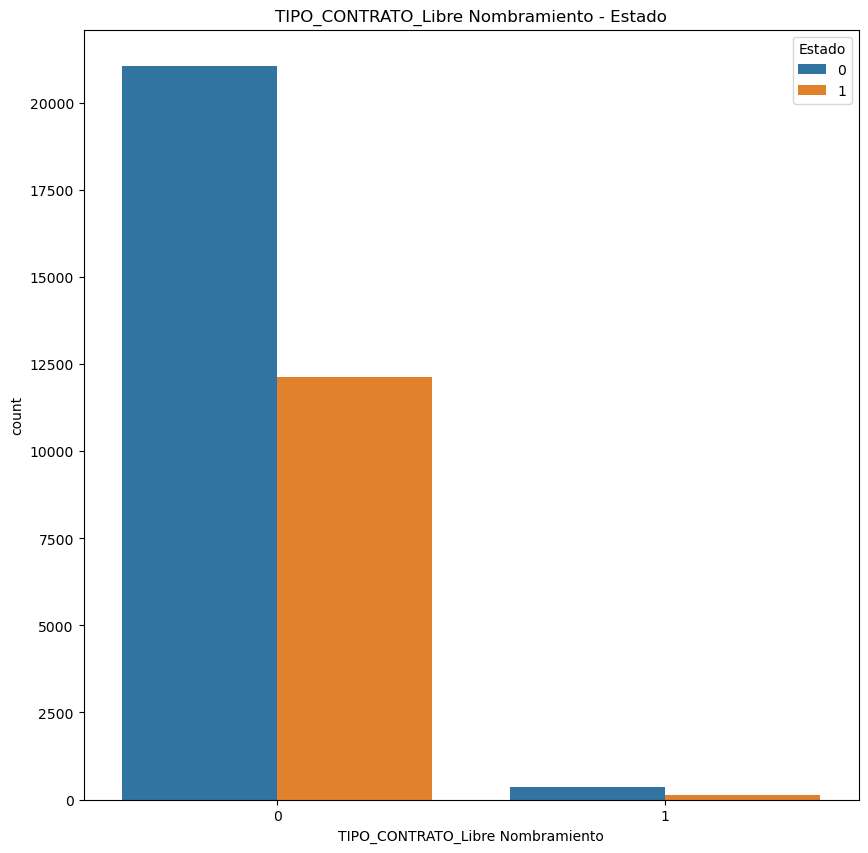

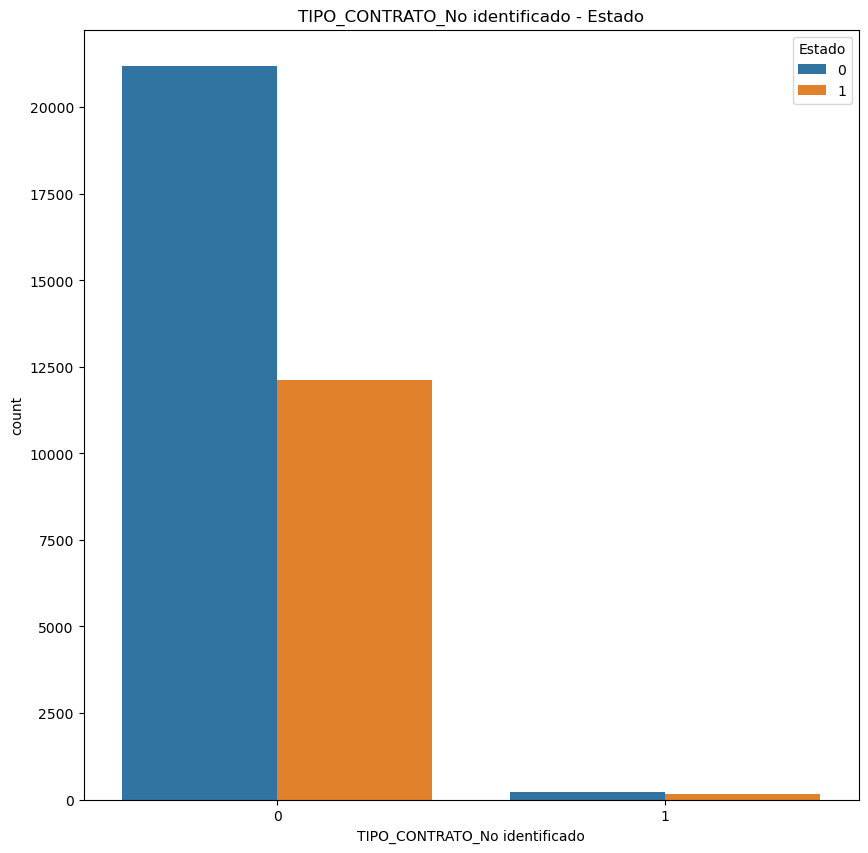

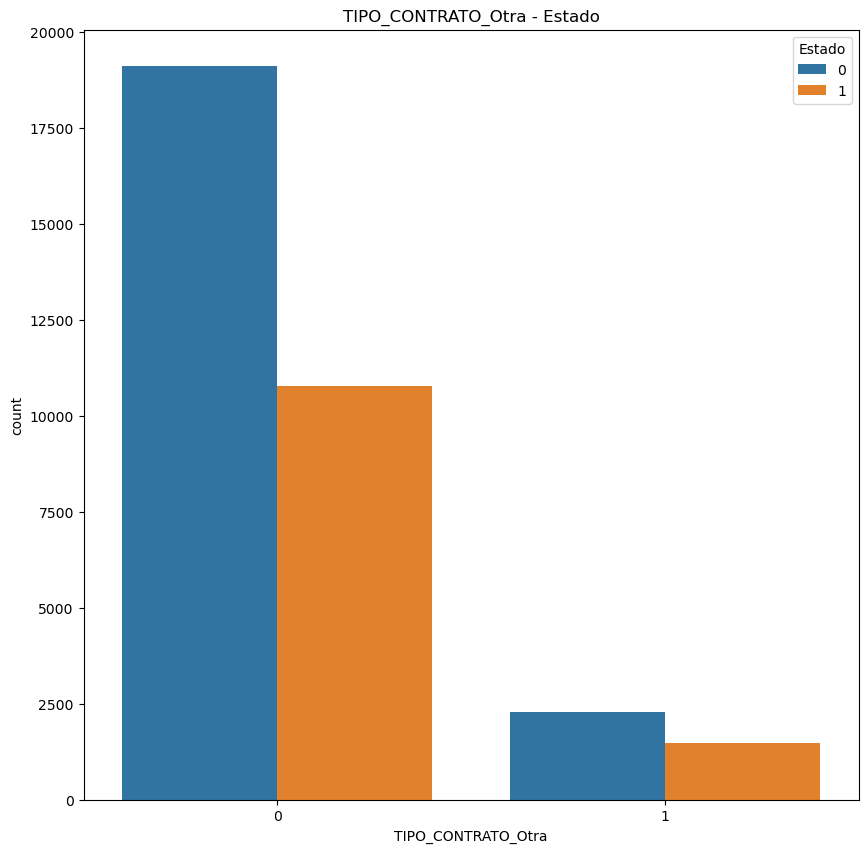

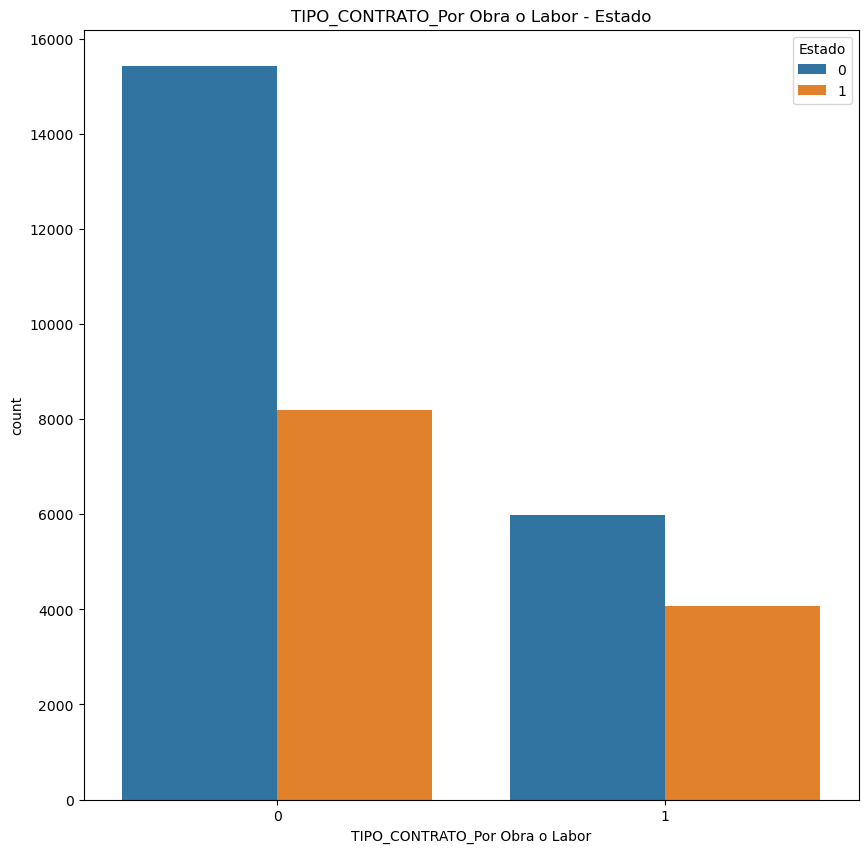

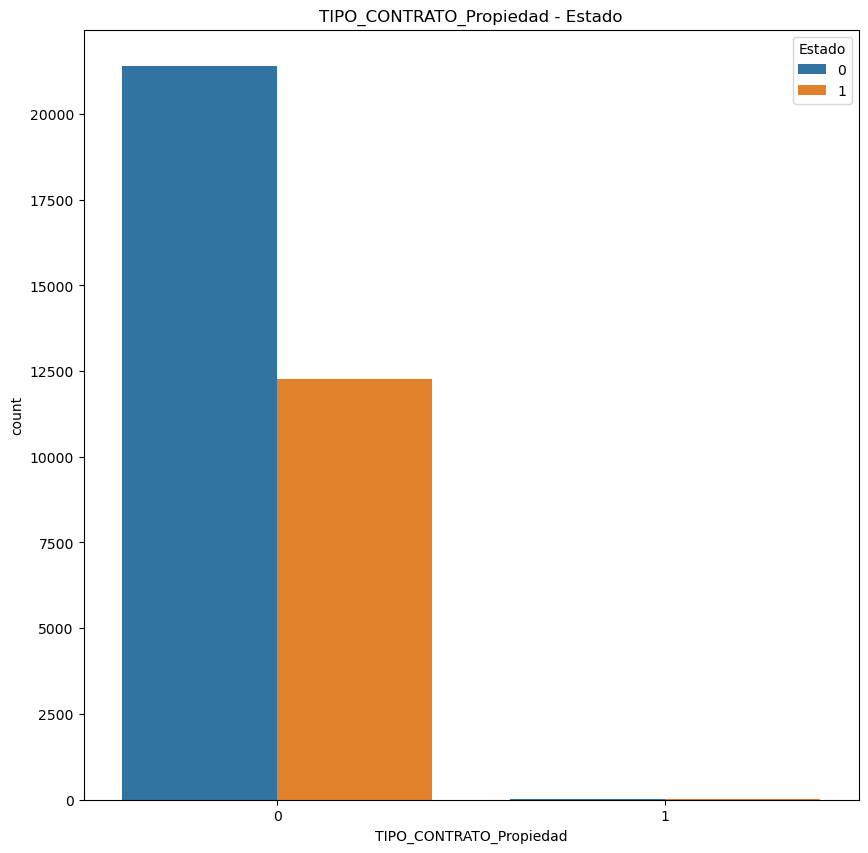

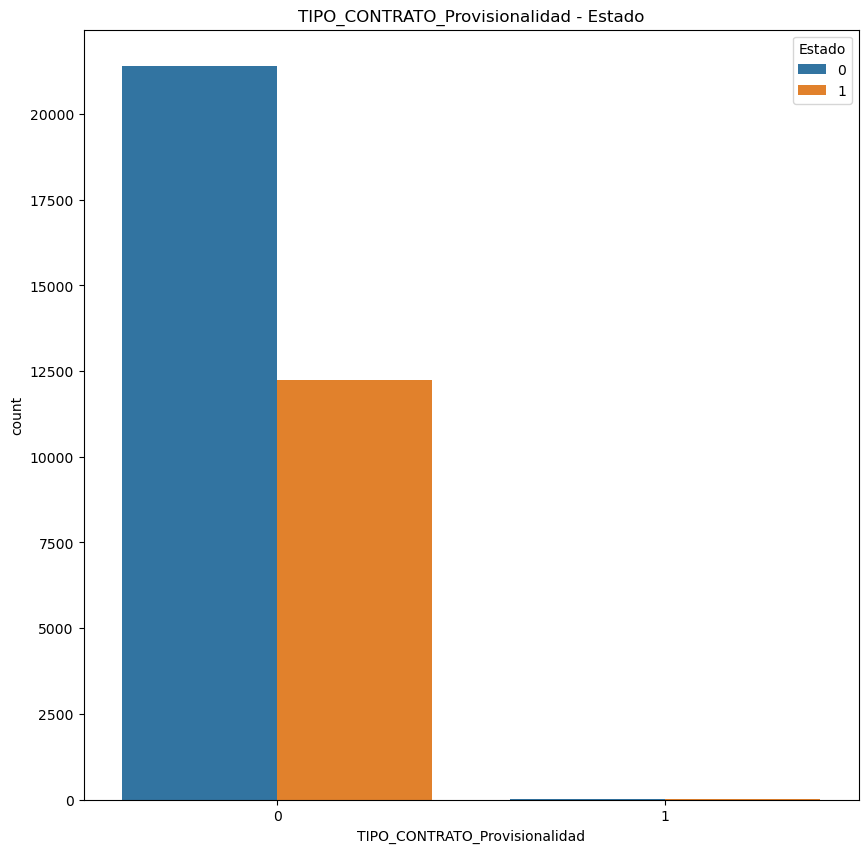

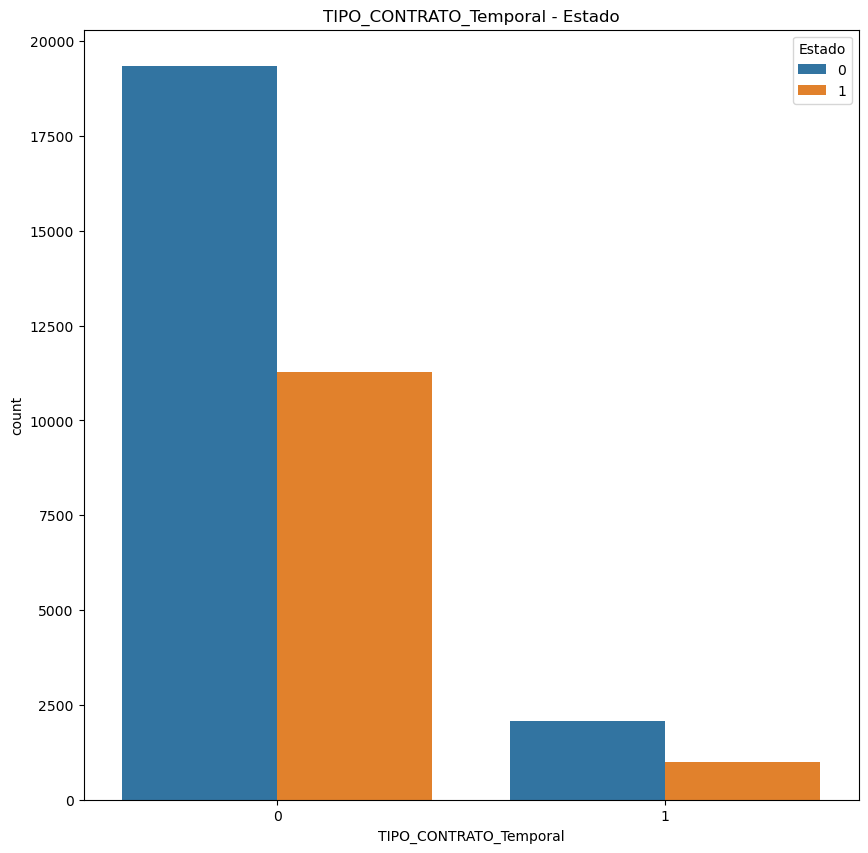

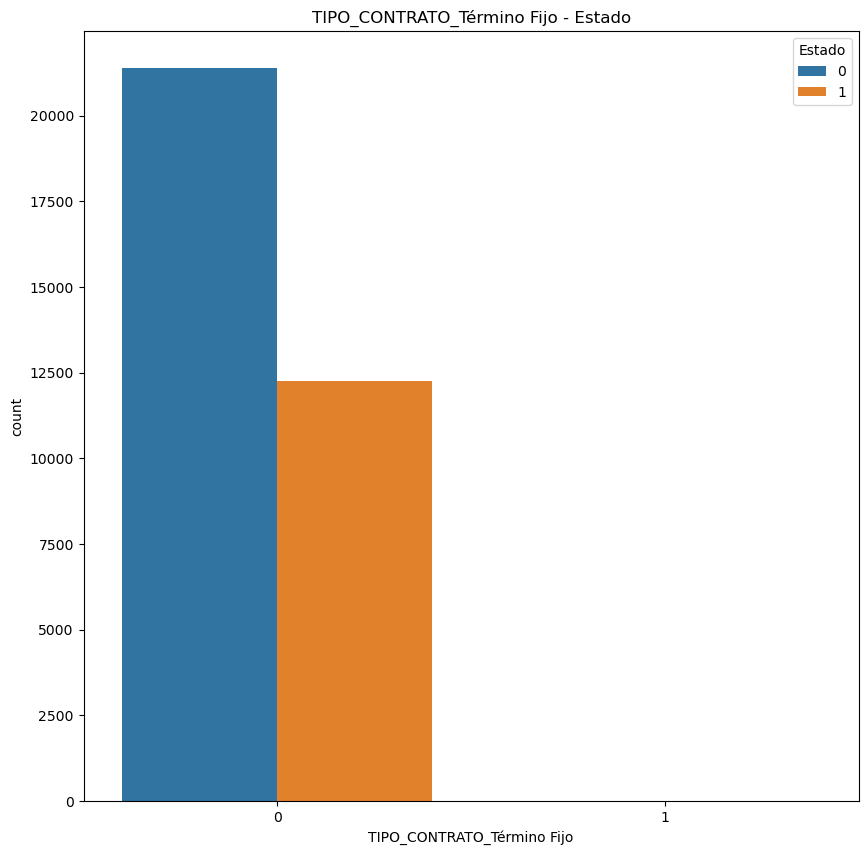

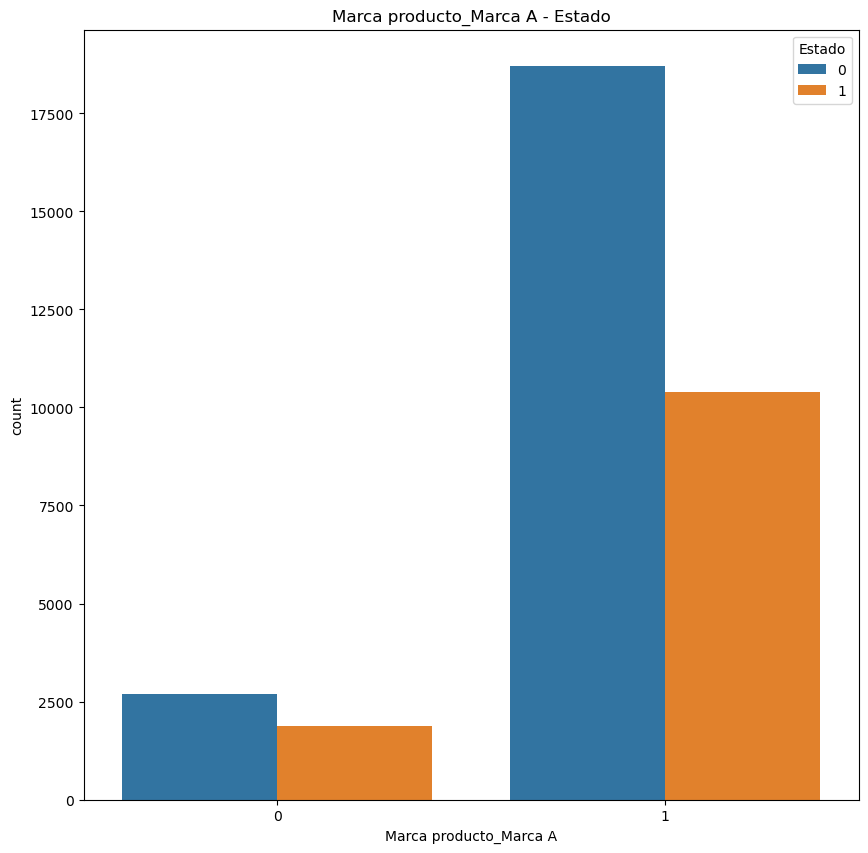

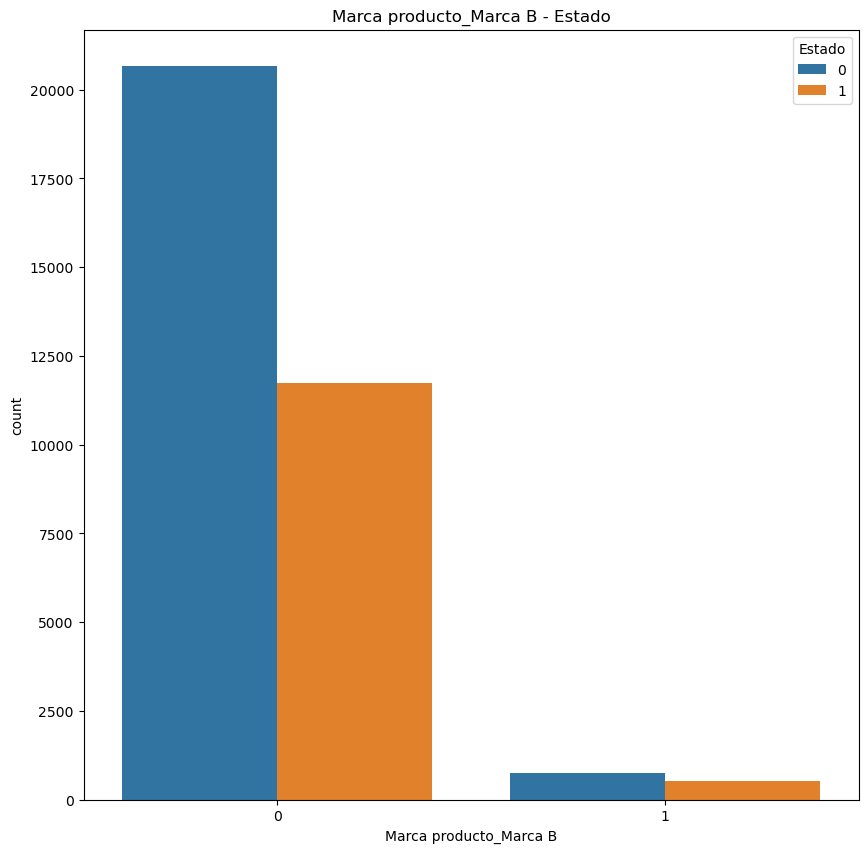

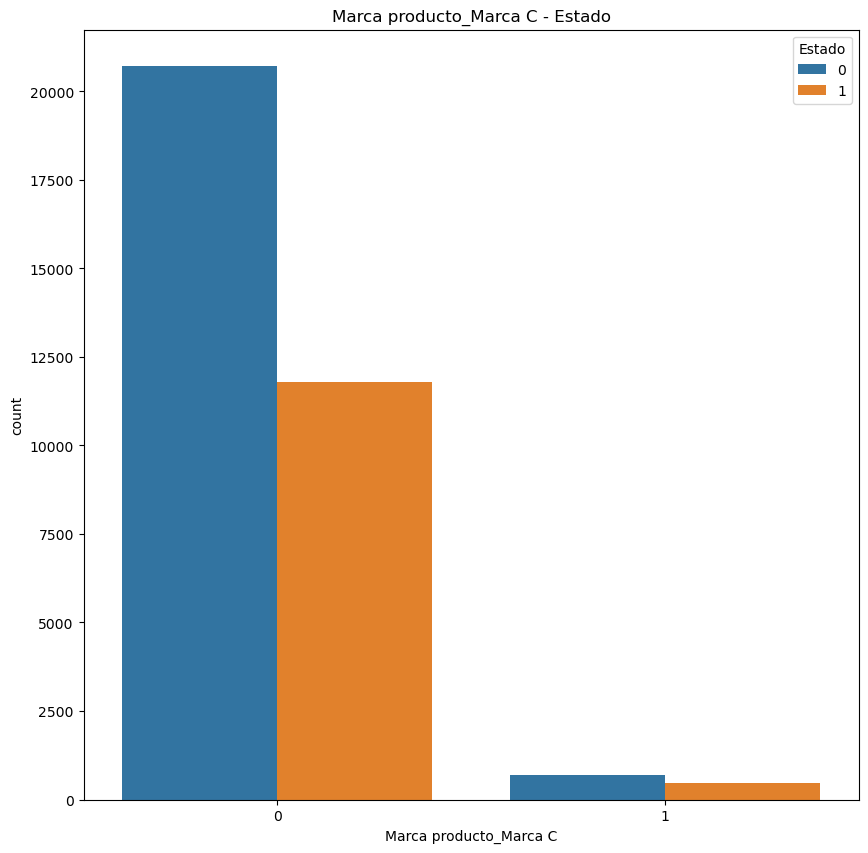

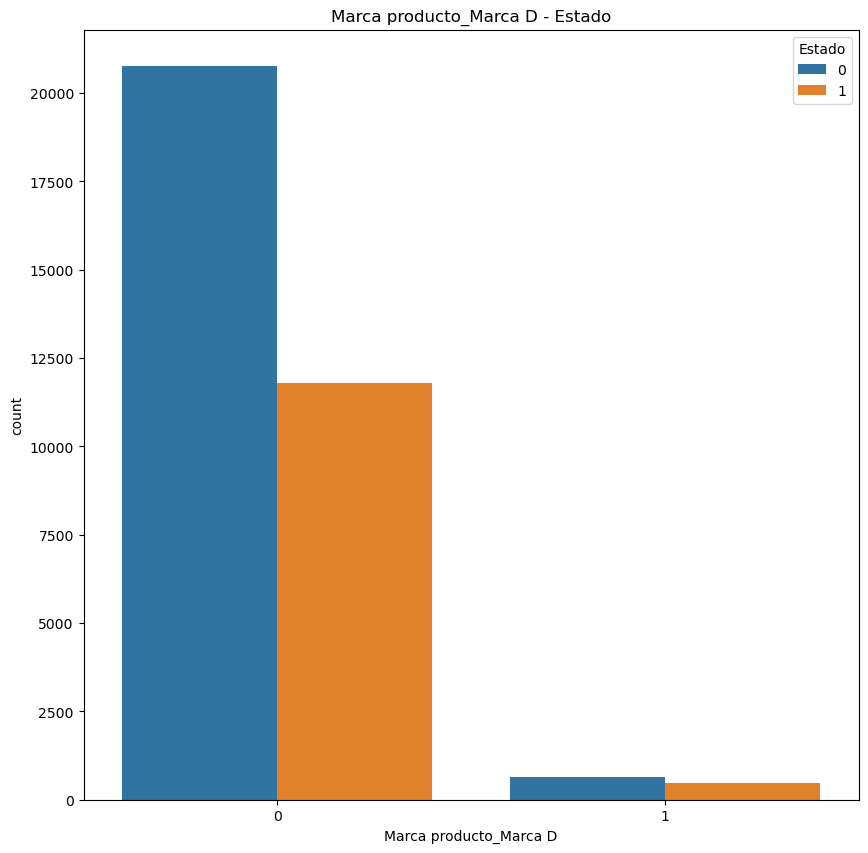

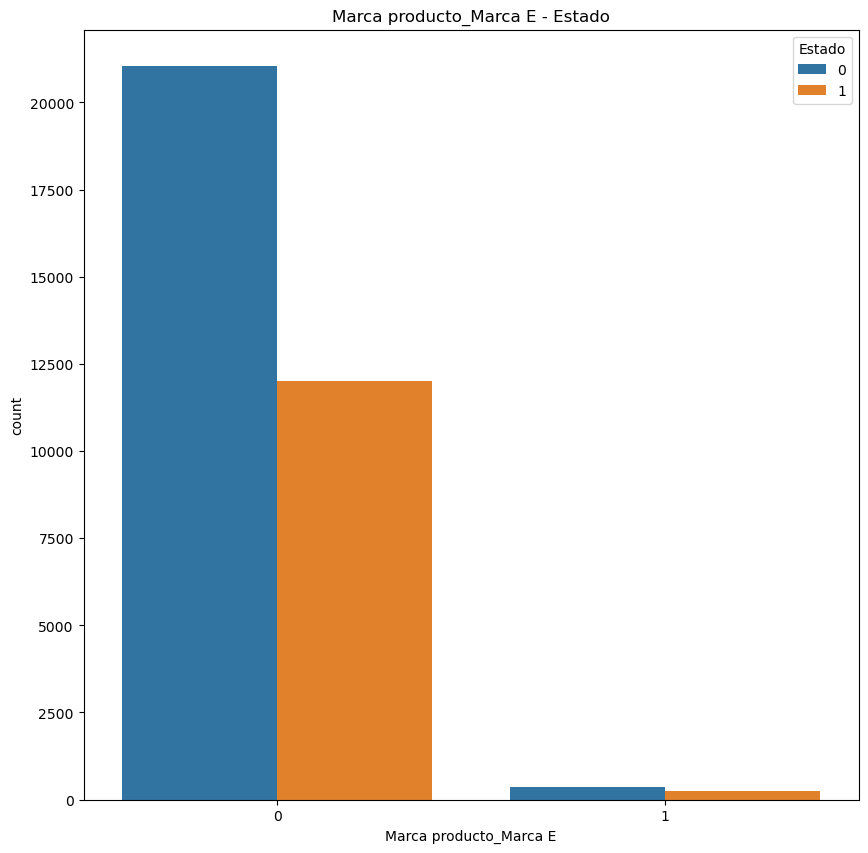

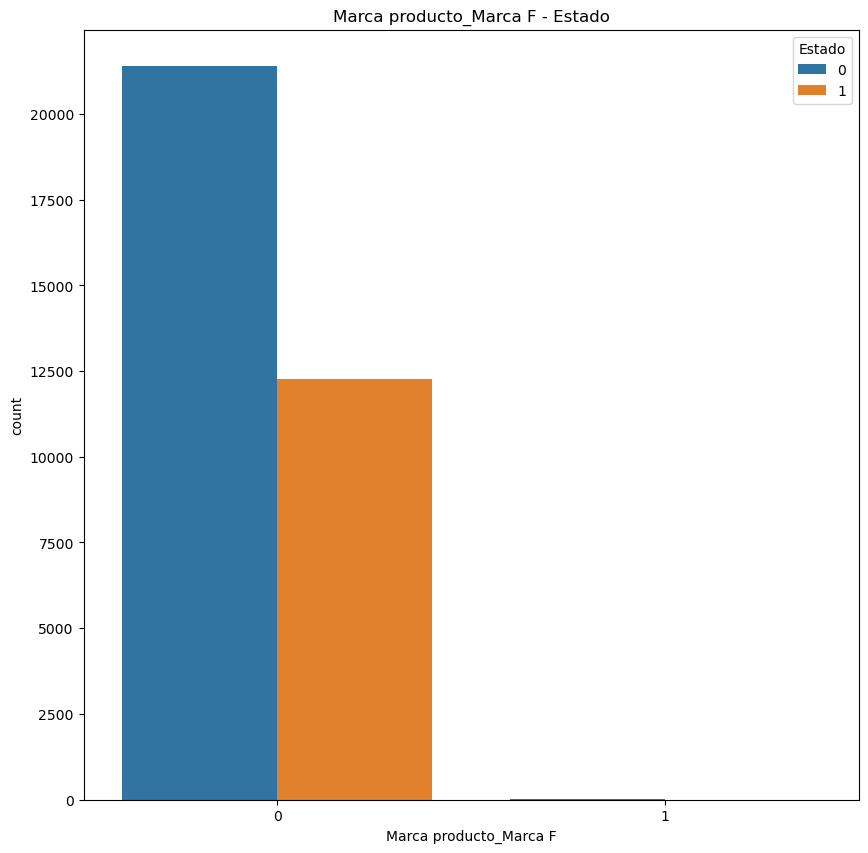

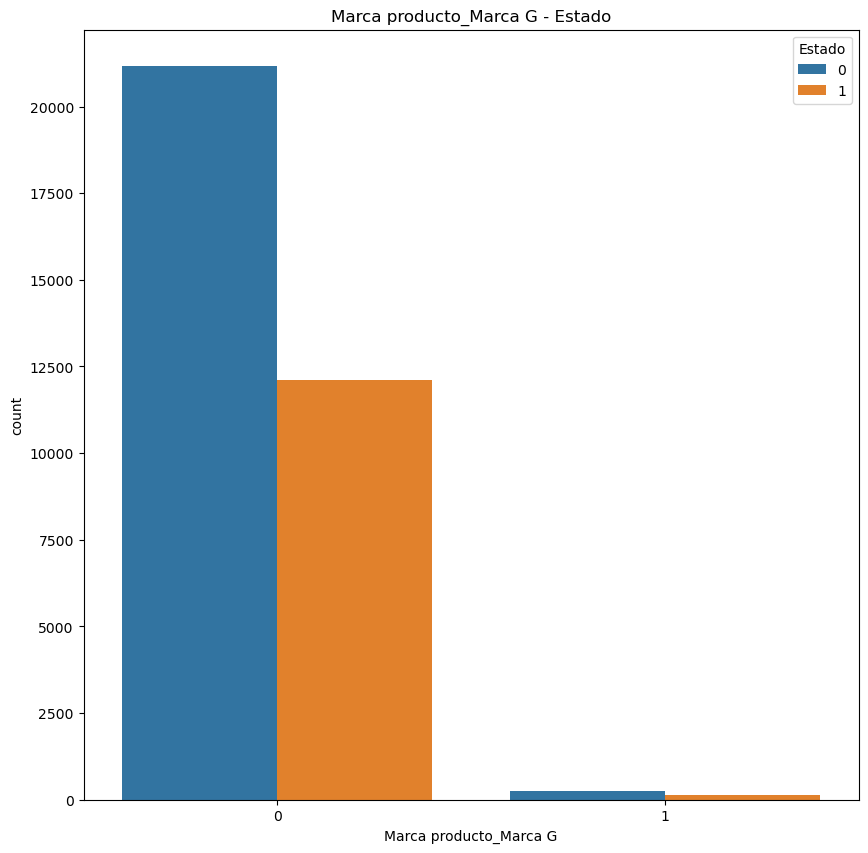

In [15]:
#Función para graficar
def plot_categoricas(column):
    fig = plt.figure(figsize=(10,10))
    plt.title(f'{column} - Estado')
    sns.countplot(data=df_xyz, x=column, hue='Estado')
    plt.show()
    
categoricas = df_xyz.select_dtypes(include='uint8').columns

for _ in categoricas:
    plot_categoricas(_)

Numericas

In [16]:
#fig = plt.figure(figsize=(10,10))
#sns.pairplot(data=df_xyz, hue="Estado")
#plt.show()

## Escalado de datos

In [17]:
#Utilizo MinMaxScaler

scaler = MinMaxScaler()
df_xyz_scaled = scaler.fit_transform(df_xyz)
print("Dimensión del Vector: \n --->", df_xyz_scaled.shape)

#Genero un Dataframe
df_xyz_scaled = pd.DataFrame(df_xyz_scaled, columns = df_xyz.columns )
df_xyz_scaled.head(5)

Dimensión del Vector: 
 ---> (33668, 85)


MULTAS_SIMIT      EDAD  CUOTA_INICIAL  PERSONAS_CARGO     PLAZO  \
0           0.0  0.014993       0.000000        0.035714  0.777778   
1           0.0  0.030485       0.104545        0.000000  0.777778   
2           0.0  0.030985       0.047727        0.000000  0.555556   
3           0.0  0.012994       0.000000        0.035714  0.555556   
4           0.0  0.015492       0.370909        0.071429  0.777778   

   VALOR_SOLICITADO  INGRESOS   EGRESOS  ENDEUDAMIENTO  CREDITOS_VIGENTES  \
0          0.304163  0.007406  0.006737       0.002391           0.022472   
1          0.364211  0.008019  0.003963       0.010692           0.101124   
2          0.338271  0.004939  0.002642       0.006445           0.078652   
3          0.304163  0.005516  0.004624       0.002153           0.022472   
4          0.537950  0.012894  0.014135       0.001789           0.022472   

   ...  TIPO_CONTRATO_Provisionalidad  TIPO_CONTRATO_Temporal  \
0  ...                            0.0                     0.0   
1  ...                            0.0                     0.0   
2  ...                            0.0                     0.0   
3  ...                            0.0                     0.0   
4  ...                            0.0                     0.0   

   TIPO_CONTRATO_Término Fijo  Marca producto_Marca A  Marca producto_Marca B  \
0                         0.0                     1.0                     0.0   
1                         0.0                     1.0                     0.0   
2                         0.0                     0.0                     1.0   
3                         0.0                     1.0                     0.0   
4                         0.0                     1.0                     0.0   

   Marca producto_Marca C  Marca producto_Marca D  Marca producto_Marca E  \
0                     0.0                     0.0                     0.0   
1                     0.0                     0.0                     0.0   
2                     0.0                     0.0                     0.0   
3                     0.0                     0.0                     0.0   
4                     0.0                     0.0                     0.0   

   Marca producto_Marca F  Marca producto_Marca G  
0                     0.0                     0.0  
1                     0.0                     0.0  
2                     0.0                     0.0  
3                     0.0                     0.0  
4                     0.0                     0.0  

[5 rows x 85 columns]

## Entrenamiento de modelo de Regresión Logística Binomial

In [18]:
X = df_xyz_scaled.drop('Estado', axis=1)
y = df_xyz_scaled['Estado'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42) 

In [19]:
model = LogisticRegression()
result = model.fit(X_train, y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy

In [20]:
pred_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, pred_test))

0.6433026433026433


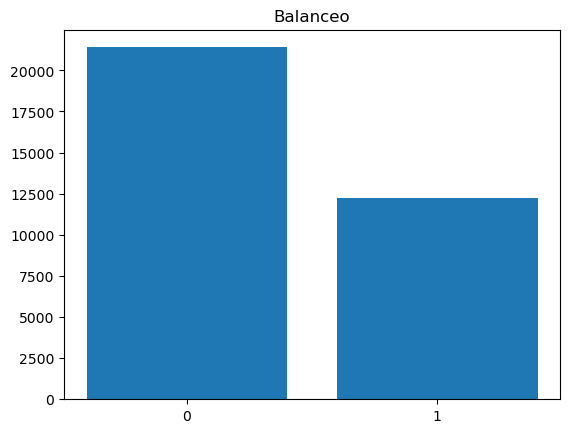

In [21]:
x_values = df_xyz['Estado'].unique()
y_values = df_xyz['Estado'].value_counts().tolist()

plt.bar(x_values, y_values)
plt.title('Balanceo')
ax = plt.subplot()                   #Axis
ax.set_xticks(x_values) 
plt.show()
plt.close('all')

In [22]:
model.predict_proba(X_test) #[0-1]

array([[0.59222448, 0.40777552],
       [0.605984  , 0.394016  ],
       [0.66734845, 0.33265155],
       ...,
       [0.60252737, 0.39747263],
       [0.48644434, 0.51355566],
       [0.70670583, 0.29329417]])

In [23]:
model.coef_ #Features con mayor importancia (Positivos 1 - Negativos 0)

array([[-2.48417081e-01, -8.35868002e-01,  1.21372356e+00,
        -8.01684936e-01, -2.06789402e-01,  3.58005601e-01,
        -2.90612592e+00, -1.63087893e+00, -6.05098107e-01,
         1.45173267e+00,  3.30698032e-01, -6.17136637e-01,
        -2.24294974e-01, -2.02292989e-01, -8.88795574e-04,
         1.22519054e-02, -8.39094289e-02, -4.04298658e-01,
         5.02570149e-02, -1.08649006e-01, -9.83827177e-03,
         5.54173311e-02, -1.45336097e-01,  6.55492584e-02,
        -1.22150160e-01, -4.02609368e-02, -3.74621764e-02,
        -1.52866720e-02, -6.85712316e-02, -2.22620149e-02,
        -4.91987434e-01,  1.76664606e-01, -5.75231530e-02,
         7.08440494e-02, -1.02324017e-01, -1.48241900e-01,
        -1.12966851e-01, -1.69836989e-01, -1.59705096e-01,
         1.72542935e-01,  3.08435706e-02, -3.92236324e-02,
        -1.05022387e+00,  6.23635907e-01, -3.14718879e-01,
        -1.11869083e-01, -1.97867683e-01, -2.03842887e-01,
        -2.48773934e-02,  2.37842408e-01,  2.14980633e-0

Axes(0.125,0.11;0.775x0.77)


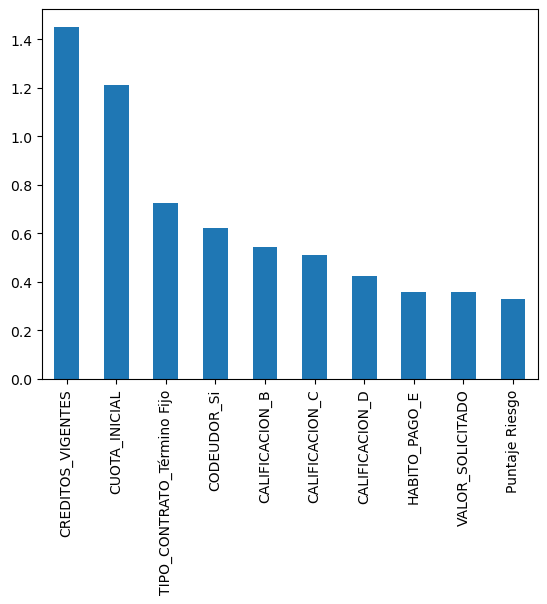

In [24]:
Pesos = pd.Series(model.coef_[0], 
                 index = X.columns.values)
print(Pesos.sort_values(ascending=False)[:10].plot(kind='bar'))

**Conclución:** Para la predicción positiva (Desiste) influyen la cantidad de creditos vigentes, ademas la cuota inicial tambien tiene una importancia considerable al momento de cancelar el proceso.

Axes(0.125,0.11;0.775x0.77)


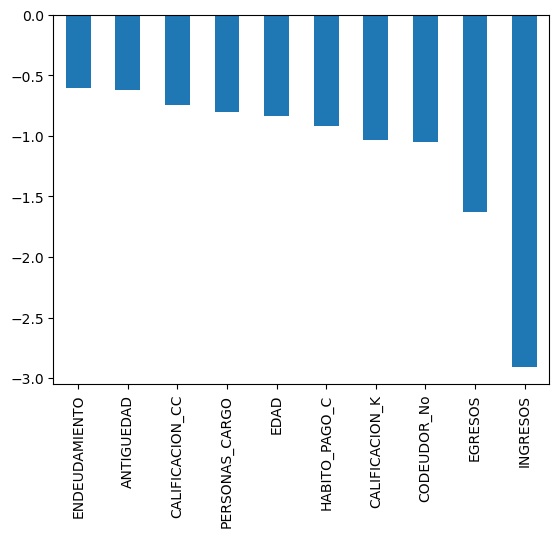

In [25]:
print(Pesos.sort_values(ascending=False)[-10:].plot(kind='bar'))

**Conclución**: Los ingresos del usuario influyen para no Desistir del credito

**Matriz de confusion**

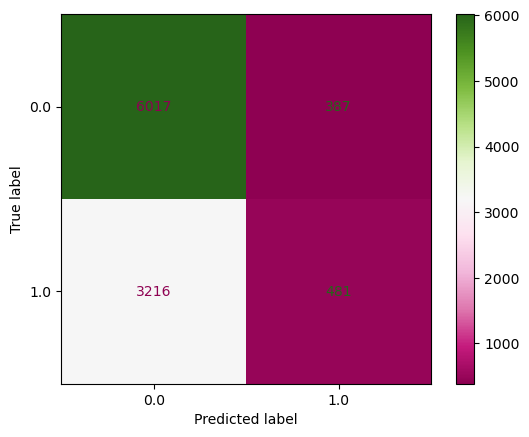

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
disp.plot(cmap='PiYG')
plt.show()

In [27]:
pred_dataset = model.predict(df_xyz_scaled.drop(['Estado'], axis=1))
Probabilidades = model.predict_proba(df_xyz_scaled.drop(['Estado'], axis=1))
df_Proba = pd.DataFrame(Probabilidades, columns = ['P_Desistir', 'P_No_Desiste'])
df_Proba.tail(2)

P_Desistir  P_No_Desiste
33666    0.495274      0.504726
33667    0.672215      0.327785

In [28]:
df_Proba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33668 entries, 0 to 33667
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   P_Desistir    33668 non-null  float64
 1   P_No_Desiste  33668 non-null  float64
dtypes: float64(2)
memory usage: 526.2 KB


In [29]:
df_xyz_final = pd.concat([df_xyz_final, df_Proba], axis=1)
df_xyz_final.head(10)                       

SOLICITUD FECHA_INICIO  MULTAS_SIMIT  EDAD  CUOTA_INICIAL GENERO  \
0          1   2017-01-02          0.00    29              0      F   
1          2   2017-01-02          0.00    60        1035000      F   
2          3   2017-01-02          0.00    61         472500      M   
3          4   2017-01-02          0.00    25              0      M   
4          5   2017-01-02          0.00    30        3672000      F   
5          6   2017-01-02    1147628.50    48        1800000      F   
6          7   2017-01-02     451575.31    30         454500      F   
7          8   2017-01-02          0.00    25         702000      F   
8          9   2017-01-02          0.00    27              0      M   
9         10   2017-01-02          0.00    27        1170000      F   

  ESTADO_CIVIL NIVEL_ESTUDIO TIPO_VIVIENDA  PERSONAS_CARGO  ... ENDEUDAMIENTO  \
0   Divorciado   Tecnólogico     Arrendada               2  ...       85860.0   
1      Soltero   Tecnólogico     Arrendada               1  ...     1270940.0   
2   Divorciado   Tecnólogico     Arrendada               1  ...      664620.0   
3       Casado   Tecnólogico     Arrendada               2  ...       51940.0   
4   Divorciado   Tecnólogico     Arrendada               3  ...           0.0   
5   Divorciado   Tecnólogico     Arrendada               3  ...           0.0   
6   Divorciado   Tecnólogico     Arrendada               2  ...      624340.0   
7       Casado       Técnico     Arrendada               1  ...      492900.0   
8   Divorciado       Técnico     Arrendada               1  ...      496080.0   
9   Divorciado      Primaria     Arrendada               2  ...           0.0   

   CALIFICACION CREDITOS_VIGENTES  Puntaje Riesgo  \
0             A                 2            2190   
1             C                 9            2142   
2             C                 7            2073   
3             A                 2            1929   
4             A                 2               3   
5             A                 0               0   
6             A                 7            1989   
7             C                 1            2373   
8             A                 4            2016   
9             A                 0            1956   

                       TIPO_CONTRATO  ANTIGUEDAD Marca producto     Estado  \
0                         Indefinido          10        Marca A   Aprobada   
1                   Por Obra o Labor         131        Marca A  Desistida   
2                         Indefinido          63        Marca B    Anulada   
3                               Otra          12        Marca A     Negada   
4  INDEPENDIENTE SIN ESTABLECIMIENTO         131        Marca A    Anulada   
5  INDEPENDIENTE CON ESTABLECIMIENTO          55        Marca A  Desistida   
6                         Indefinido          16        Marca A   Aprobada   
7                   Por Obra o Labor          21        Marca A    Anulada   
8                   Por Obra o Labor          58        Marca A     Negada   
9                               Otra           2        Marca A  Desistida   

  P_Desistir  P_No_Desiste  
0   0.628352      0.371648  
1   0.509444      0.490556  
2   0.440538      0.559462  
3   0.634929      0.365071  
4   0.688457      0.311543  
5   0.699587      0.300413  
6   0.609667      0.390333  
7   0.503908      0.496092  
8   0.618811      0.381189  
9   0.583112      0.416888  

[10 rows x 29 columns]

In [30]:
df_xyz_final.to_excel('empresa_xyz.xlsx', index=False)
print("Se genero el archivo de Excel empresa_xyz'")

Se genero el archivo de Excel empresa_xyz'


# ¿Ahora que sigue? ...

Bien, se pueden realizar varios cambios para el entrenamiento, pero lo primero que se deberia revisar es el desbalance en el dataset y realizar un entrenamiento con los datos balanceados.

Tambien se podria llevar a un concenso utilizando un modelo Gaussiano Naive Bayes, existen gran cantidad de mejoras para esta solución inicial.

### Undersampling

In [31]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

In [32]:
X = df_xyz.drop('Estado', axis=1)

In [33]:
X_over, y_over = undersampler.fit_resample(X, y)

In [37]:
print(df_xyz.shape)
print(X_over.shape)

(33668, 85)
(24530, 84)
